In [15]:
import pandas as pd
from functools import partial
import sys

sys.path.append("../Handlers")

JSON_WRITE_MODE = "overwrite"

import preprocessing

In [16]:
csv_file = pd.read_csv("./SpamAssassin.csv")

csv_file.head()

,Subject,Date,From,To,Received,Content-Type,Body,Is_spam
0,Re: New Sequences Window,"Thu, 22 Aug 2002 18:26:25 +0700",['Robert Elz <kre@munnari.OZ.AU>'],['Chris Garrigues <cwg-dated-1030377287.06fa6d...,['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,[zzzzteana] RE: Alexander,"Thu, 22 Aug 2002 12:46:18 +0100",['Steve Burt <Steve_Burt@cursor-system.com>'],"['""\'zzzzteana@yahoogroups.com\'"" <zzzzteana@y...",['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,[zzzzteana] Moscow bomber,"Thu, 22 Aug 2002 13:52:38 +0100",['Tim Chapman <timc@2ubh.com>'],['zzzzteana <zzzzteana@yahoogroups.com>'],['from localhost (localhost [127.0.0.1])\tby p...,text/plain,Man Threatens Explosion In Moscow \n\nThursday...,0
3,[IRR] Klez: The Virus That Won't Die,"Thu, 22 Aug 2002 09:15:25 -0400",['Monty Solomon <monty@roscom.com>'],['undisclosed-recipient:;'],['from localhost (localhost [127.0.0.1])\tby p...,text/plain,Klez: The Virus That Won't Die\n \nAlready the...,0
4,Re: Insert signature,"Thu, 22 Aug 2002 23:36:32 +1000",['Tony Nugent <tony@linuxworks.com.au>'],['Exmh Users Mailing List <exmh-users@example....,['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",0


0    2801
1    1397
Name: Is_spam, dtype: int64


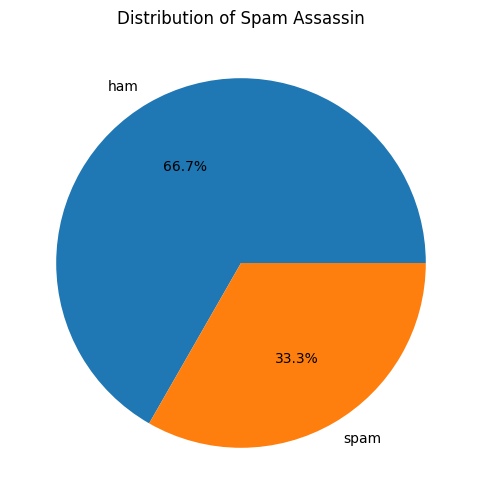

In [17]:
import matplotlib.pyplot as plt
import os

label_counts = csv_file["Is_spam"].value_counts()

print(label_counts)

plt.figure(figsize=(8, 6))
plt.pie(label_counts.values, labels=["ham", "spam"], autopct='%1.1f%%')
plt.title('Distribution of Spam Assassin')
plt.savefig(os.path.join("./figs", "spam_assassin_pie_chart.jpg"))
plt.show()

In [18]:
preprocession = partial(
    preprocessing.preprocess_text,
    remove_numbers=True
)

preprocessed_data = csv_file["Body"].apply(preprocession)
preprocessed_data

0       [date, DATE, TIME, chris, garrigues, messageid...
1       [martin, posted, tassos, papadopoulos, greek, ...
2       [man, threatens, explosion, moscow, thursday, ...
3       [klez, virus, wont, die, already, prolific, vi...
4       [wed, DATE, TIME, ulises, ponce, wrote, hi, co...
                              ...                        
4193    [preferred, nonsmoker, doctor, ordered, case, ...
4194    [dear, subscriber, could, show, way, get, visi...
4195    [midsummer, customer, appreciation, sale, expr...
4196    [attnsirmadan, strictly, confidential, pleased...
4197    [mv, efaeefcdfdcbaPHONENUMefaeefcdfdcba, mv, e...
Name: Body, Length: 4198, dtype: object

In [19]:
from traintest import ClassificationModel2, add_to_json_array

metric_results = []

## Stemming + CountVectorizer

In [20]:
spam_assassin_stemming = preprocessed_data.apply(preprocessing.stemming)
spam_assassin_stemming_countvec = preprocessing.vectorizing(spam_assassin_stemming, "countvectorizer")

Val size:  (420, 9081)
Threading avaiable
Begin KNeighborsClassifier
Skipping epochs training due to longevity.
Begin LinearSVC
Skipping epochs training due to longevity.
Begin MultinomialNB
Skipping epochs training due to longevity.
Begin BernoulliNB
Skipping epochs training due to longevity.
MultinomialNB classification report
range(1, 11)
10
10
BernoulliNB classification report
range(1, 11)
10
10


e:\Python Tests\AI\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC classification report
range(1, 11)
10
10
KNeighborsClassifier classification report
range(1, 11)
10
10


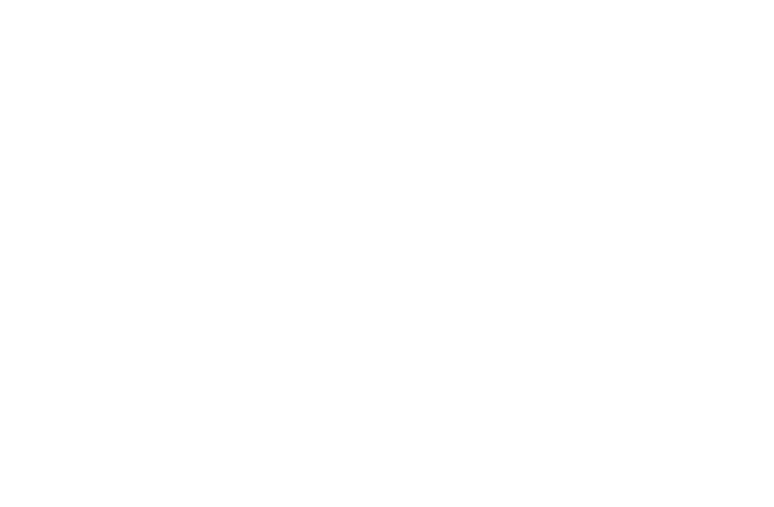

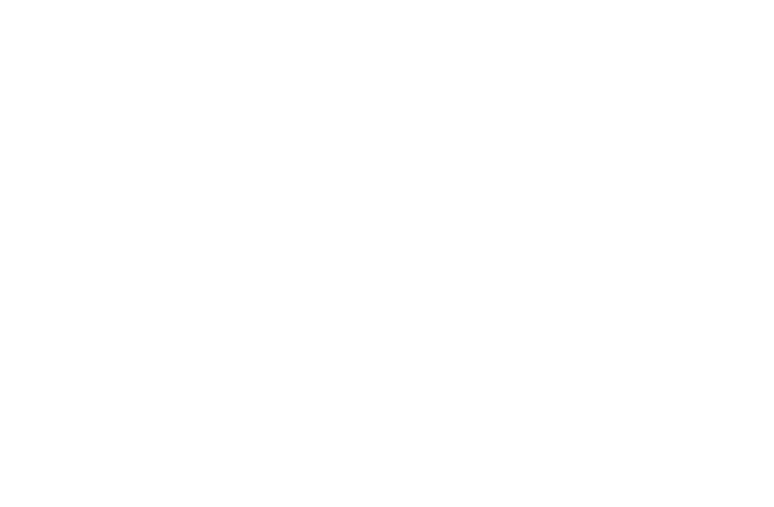

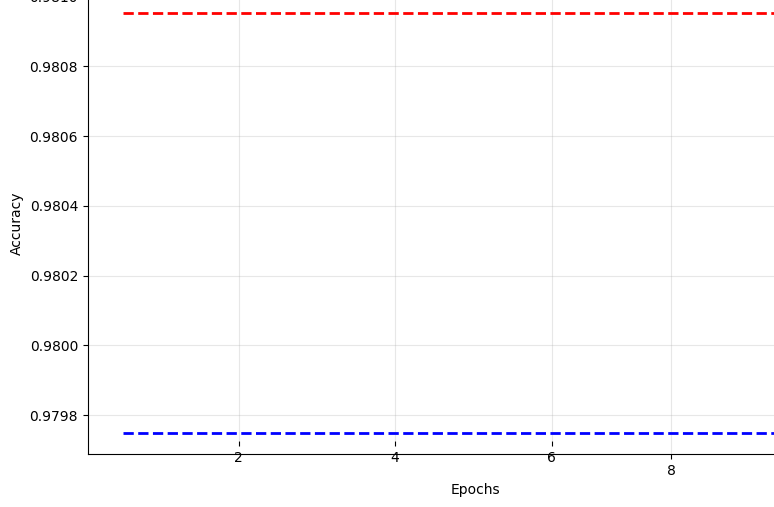

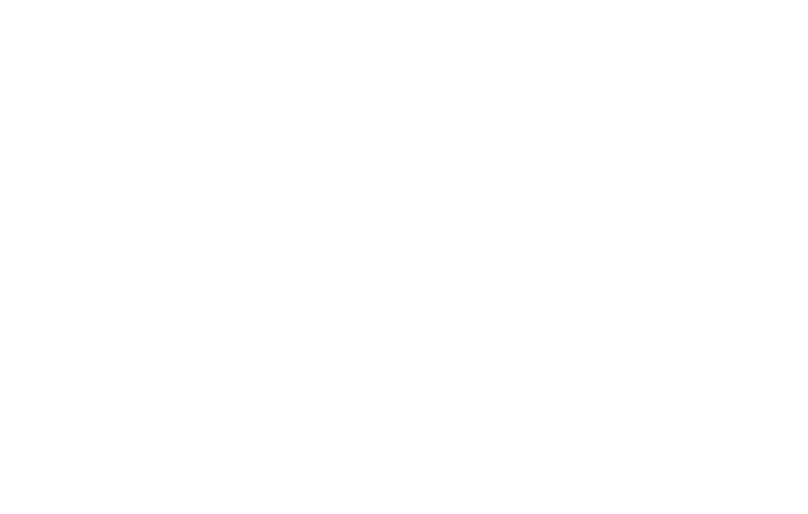

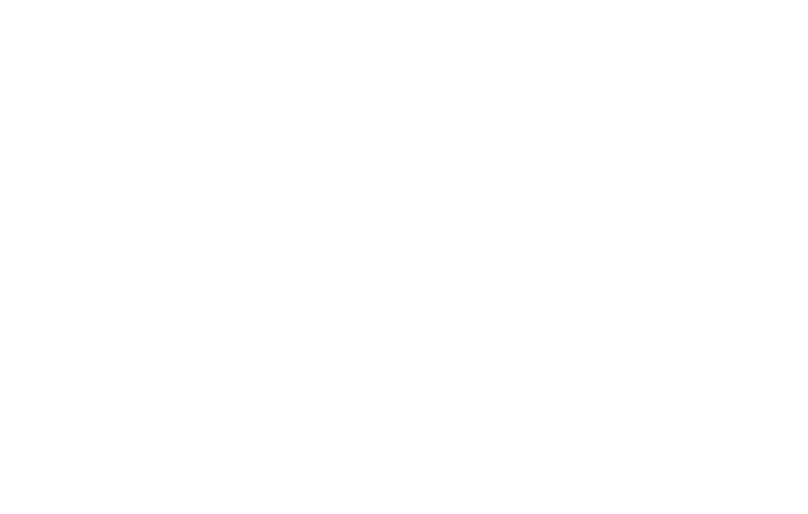

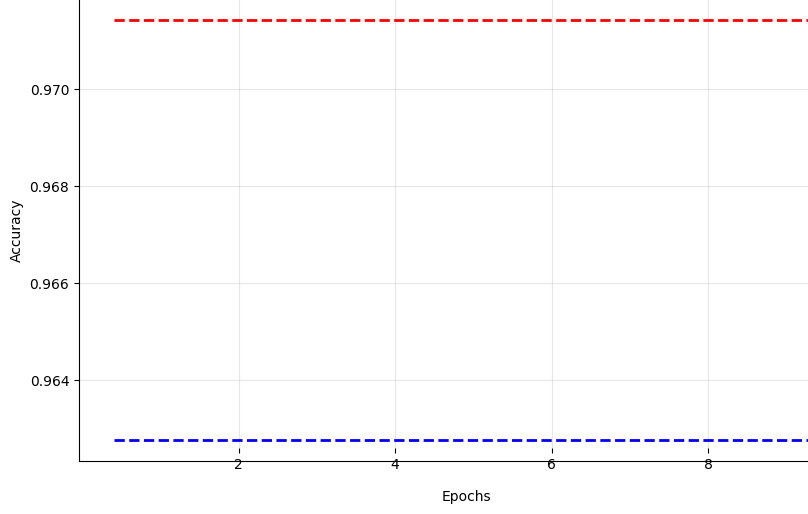

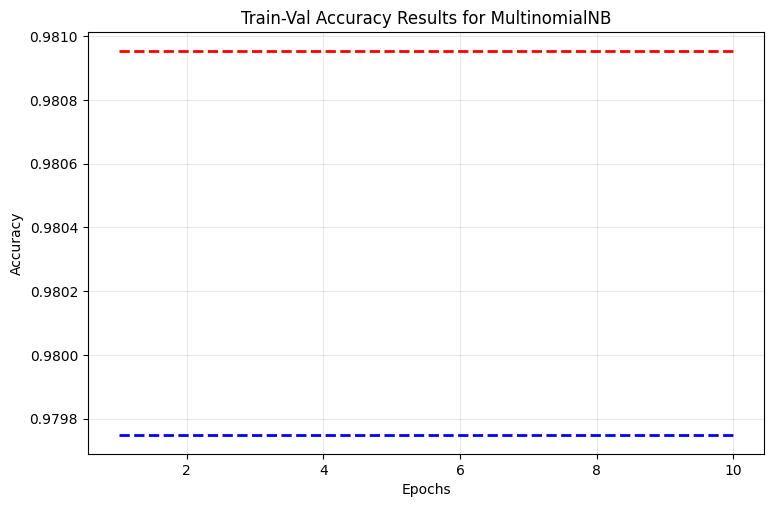

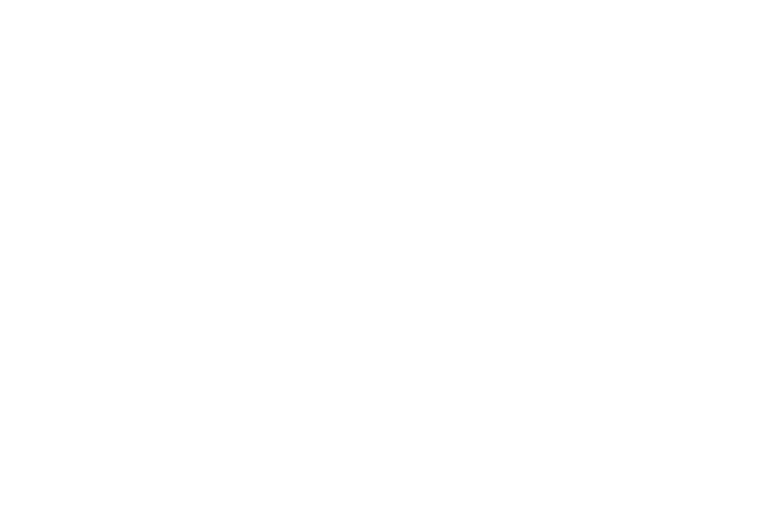

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'MultinomialNB', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9572555018970748, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567970448770009, 'macro_precision': 0.9582833852793096, 'macro_recall': 0.9437208222640634, 'macro_f1': 0.9504859710251239, 'roc_auc': 0.9437208222640634}, 'confusion_matrix': array([[278,   5],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier


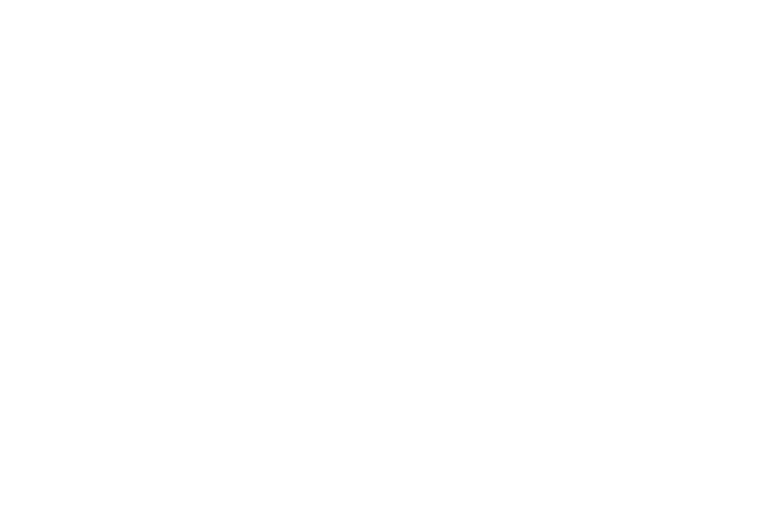

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'BernoulliNB', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier


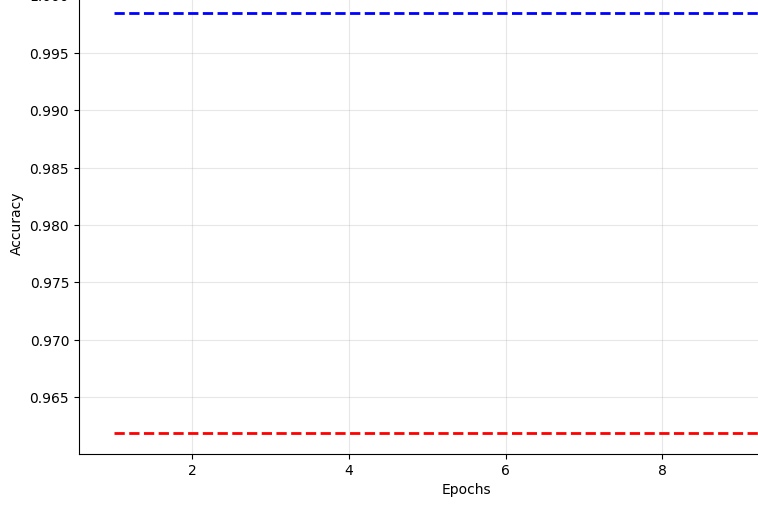

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'LinearSVC', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9737711293681444, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9737336015087492, 'macro_precision': 0.9728368646279094, 'macro_recall': 0.9673854169353382, 'macro_f1': 0.9700387162043853, 'roc_auc': 0.9673854169353382}, 'confusion_matrix': array([[279,   4],
       [  7, 130]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Skipping epochs training due to longevity.


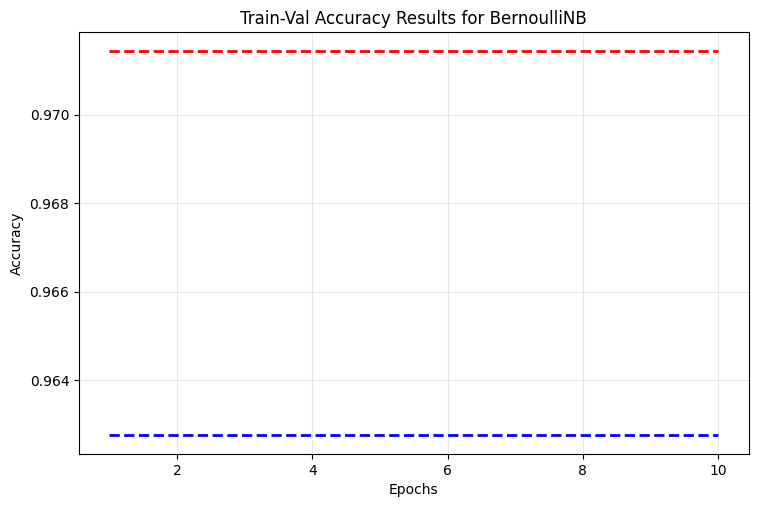

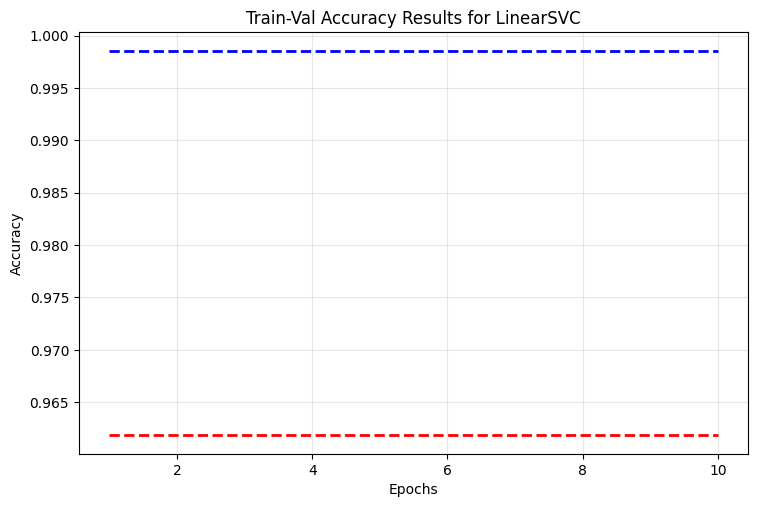

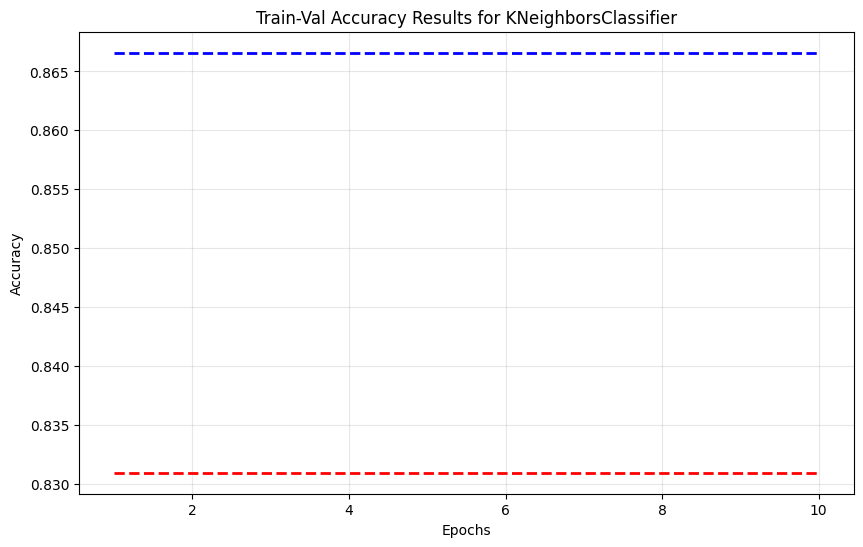

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'KNeighborsClassifier', 'metrics': {'accuracy': 0.8214285714285714, 'weighted_precision': 0.8715093494932716, 'wighted_recall': 0.8214285714285714, 'weighted_f1': 0.8269642762515423, 'macro_precision': 0.8152647833590698, 'macro_recall': 0.858076913156741, 'macro_f1': 0.8145302315722538, 'roc_auc': 0.858076913156741}, 'confusion_matrix': array([[213,  70],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
DecisionTreeClassifier classification report
range(1, 11)
10
10


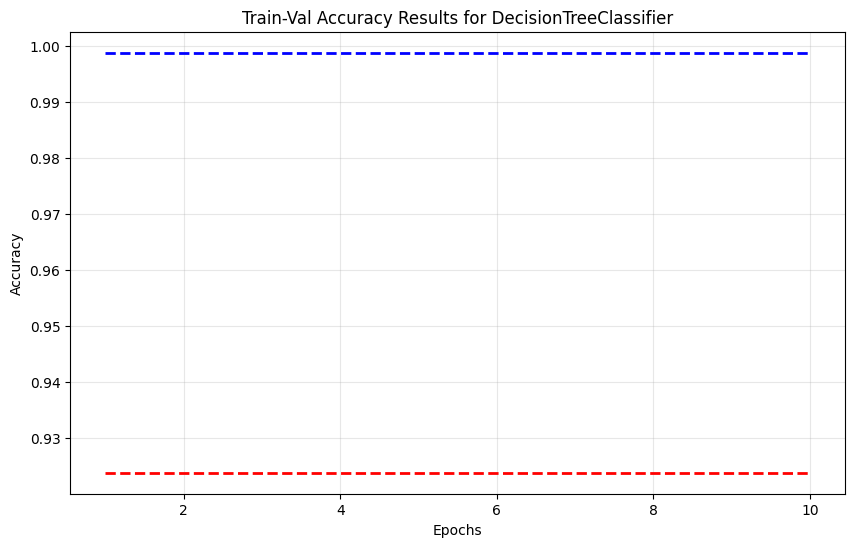

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'DecisionTreeClassifier', 'metrics': {'accuracy': 0.9357142857142857, 'weighted_precision': 0.9353835978835978, 'wighted_recall': 0.9357142857142857, 'weighted_f1': 0.9353982959338464, 'macro_precision': 0.9305555555555556, 'macro_recall': 0.9221712104407933, 'macro_f1': 0.9261713943450153, 'roc_auc': 0.9221712104407934}, 'confusion_matrix': array([[272,  11],
       [ 16, 121]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Begin Perceptron
Skipping epochs training due to longevity.
Perceptron classification report
range(1, 11)
10
10


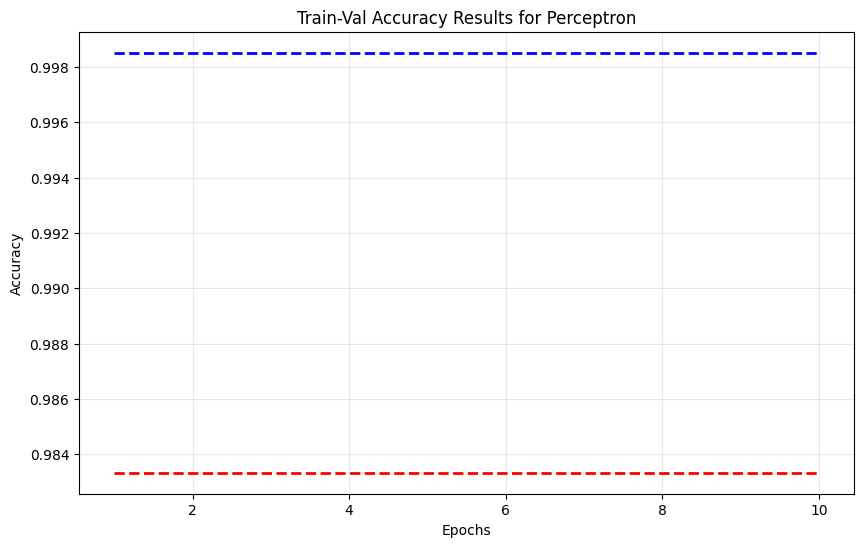

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'Perceptron', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9715836481805912, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9714814325360117, 'macro_precision': 0.9659233467318671, 'macro_recall': 0.9693843336514405, 'macro_f1': 0.967622571692877, 'roc_auc': 0.9693843336514406}, 'confusion_matrix': array([[276,   7],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Skipping epochs training due to longevity.
PassiveAggressiveClassifier classification report
range(1, 11)
10
10
RandomForestClassifier classification report
range(1, 11)
10
10


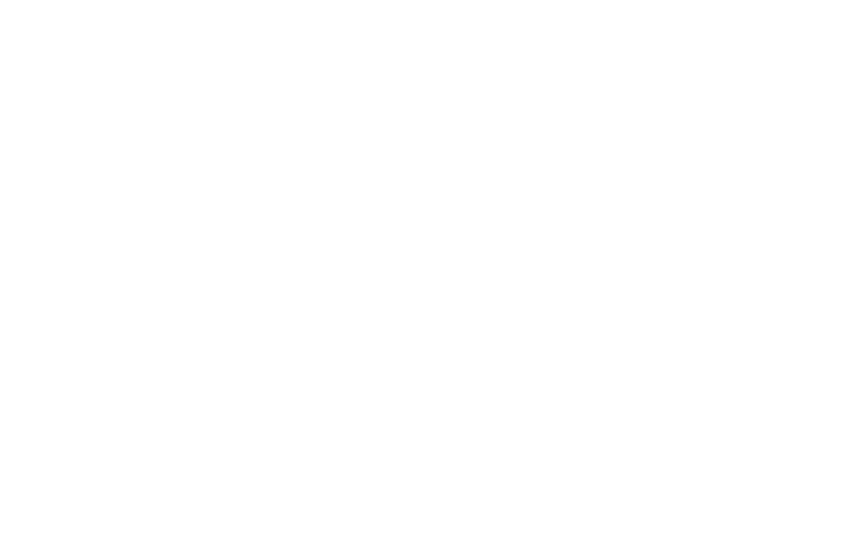

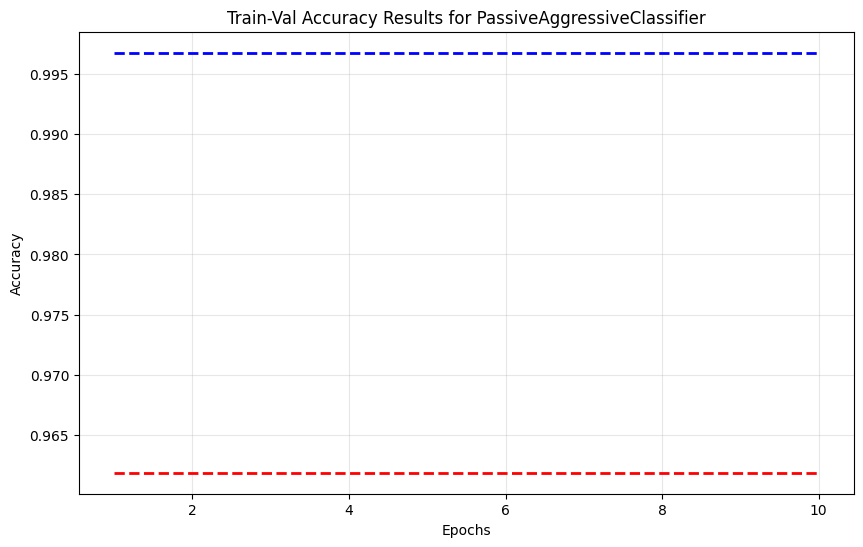

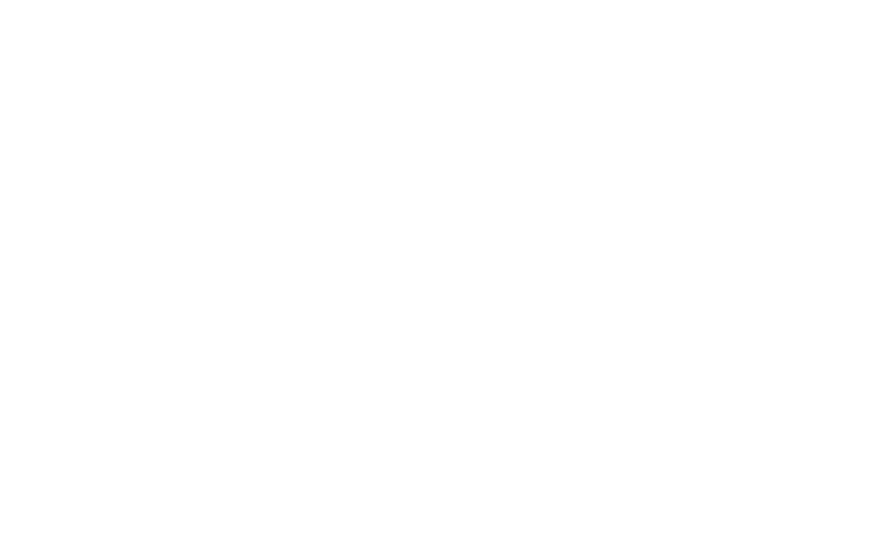

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'PassiveAggressiveClassifier', 'metrics': {'accuracy': 0.9619047619047619, 'weighted_precision': 0.9618082242643646, 'wighted_recall': 0.9619047619047619, 'weighted_f1': 0.9618317749635065, 'macro_precision': 0.9582846003898635, 'macro_recall': 0.9547857935054551, 'macro_f1': 0.956503728251864, 'roc_auc': 0.9547857935054551}, 'confusion_matrix': array([[276,   7],
       [  9, 128]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier


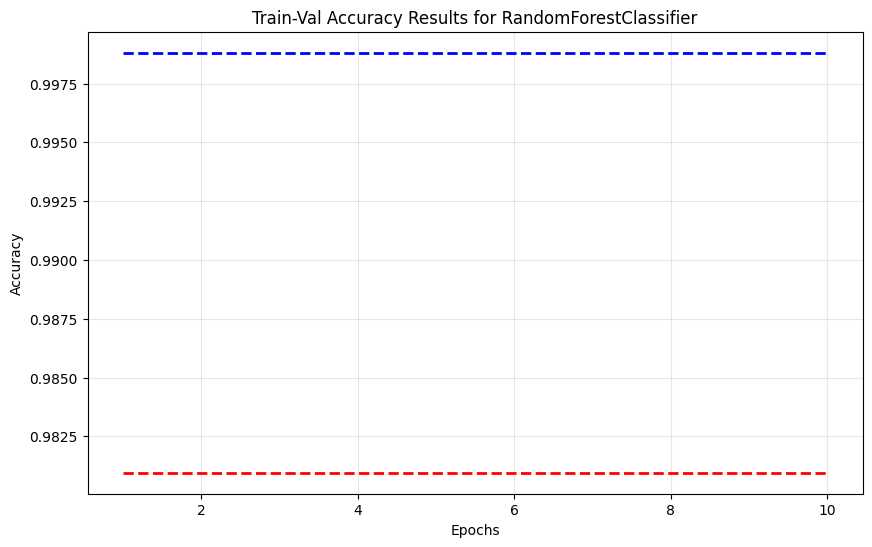

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'RandomForestClassifier', 'metrics': {'accuracy': 0.9809523809523809, 'weighted_precision': 0.9809523809523809, 'wighted_recall': 0.9809523809523809, 'weighted_f1': 0.9809523809523809, 'macro_precision': 0.9783343220448273, 'macro_recall': 0.9783343220448273, 'macro_f1': 0.9783343220448273, 'roc_auc': 0.9783343220448273}, 'confusion_matrix': array([[279,   4],
       [  4, 133]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
Skipping epochs training due to longevity.
AdaBoostClassifier classification report
range(1, 11)
10
10


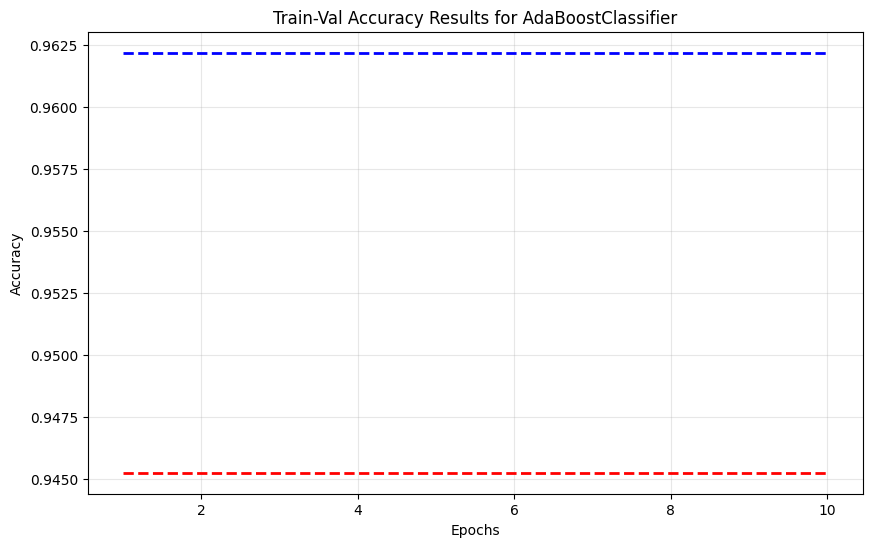

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'AdaBoostClassifier', 'metrics': {'accuracy': 0.9428571428571428, 'weighted_precision': 0.9426171546301503, 'wighted_recall': 0.9428571428571428, 'weighted_f1': 0.9425171843082291, 'macro_precision': 0.9396972978684064, 'macro_recall': 0.9293544143818834, 'macro_f1': 0.934244859617994, 'roc_auc': 0.9293544143818833}, 'confusion_matrix': array([[274,   9],
       [ 15, 122]], dtype=int64), 'epochs': 10}


ExtraTreesClassifier classification report
range(1, 11)
10
10
XGBClassifier classification report
range(1, 11)
10
10


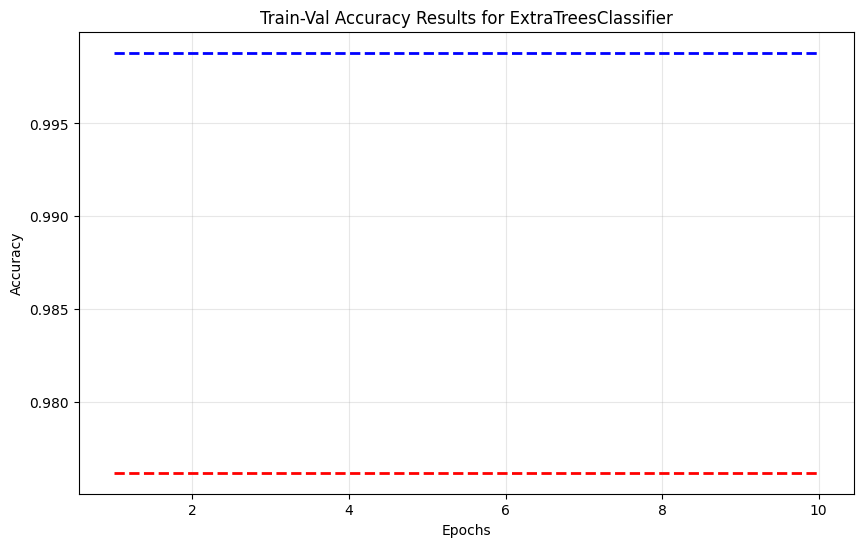

{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'ExtraTreesClassifier', 'metrics': {'accuracy': 0.9761904761904762, 'weighted_precision': 0.9762079414564284, 'wighted_recall': 0.9761904761904762, 'weighted_f1': 0.9760976515362481, 'macro_precision': 0.9765266825600587, 'macro_recall': 0.969152201387635, 'macro_f1': 0.97270955165692, 'roc_auc': 0.9691522013876351}, 'confusion_matrix': array([[280,   3],
       [  7, 130]], dtype=int64), 'epochs': 10}


{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'XGBClassifier', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714285714285714, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9714285714285714, 'macro_precision': 0.967501483067241, 'macro_recall': 0.967501483067241, 'macro_f1': 0.967501483067241, 'roc_auc': 0.9675014830672409}, 'confusion_matrix': array([[277,   6],
       [  6, 131]], dtype=int64), 'epochs': 10}




In [21]:
clsml2 = ClassificationModel2(spam_assassin_stemming_countvec, csv_file["Is_spam"], "spam_assassin_stemmed_countvec")
clsml2.split()

m_r = clsml2.train_and_evaluate_models(
    valid_size=0.1,
    max_workers=4,
    nomlp=True,
    threading=True,
    save_plot=True
)

metric_results.extend(m_r)

del spam_assassin_stemming_countvec, m_r

## Stemming + TF-IDF Vectorizer

In [22]:
spam_assassin_stemming_tfidf = preprocessing.vectorizing(spam_assassin_stemming, "tfidf")
del spam_assassin_stemming

Val size:  (420, 9081)
Threading avaiable
Begin KNeighborsClassifier
Skipping epochs training due to longevity.
Begin LinearSVC
Skipping epochs training due to longevity.
Begin MultinomialNB
Skipping epochs training due to longevity.
Begin BernoulliNB
Skipping epochs training due to longevity.
MultinomialNB classification report
range(1, 11)
10
10
LinearSVC classification report
range(1, 11)
10
10
BernoulliNB classification report
range(1, 11)
10
10


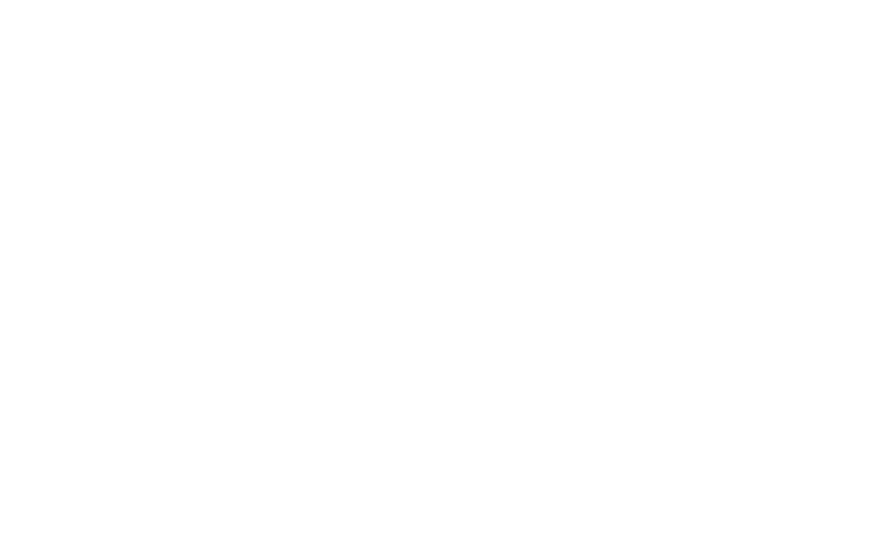

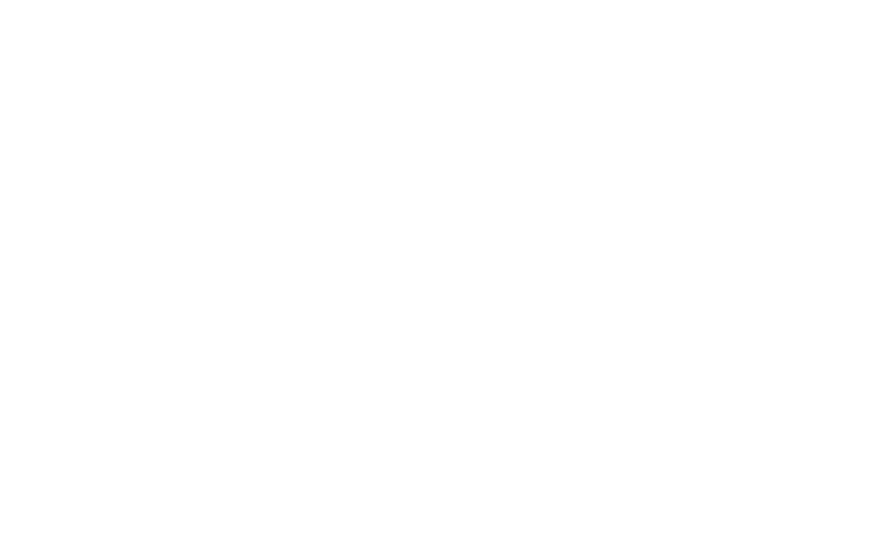

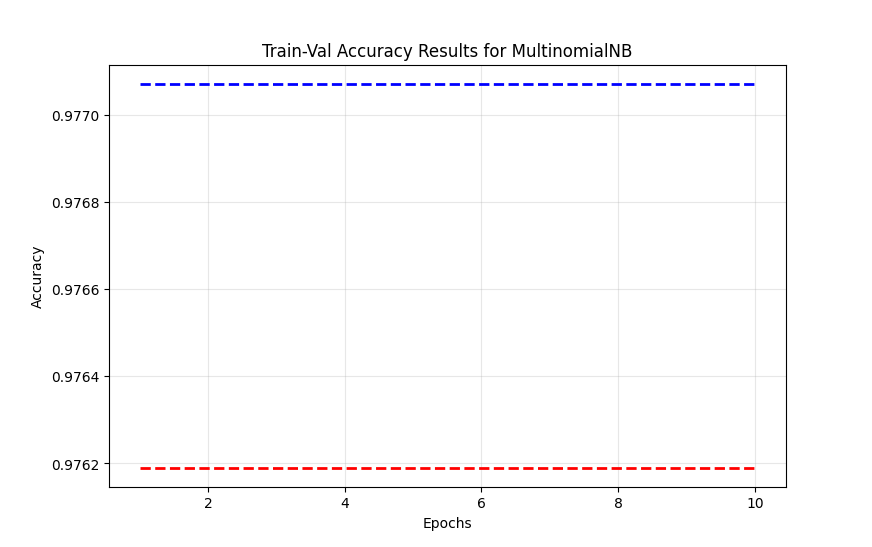

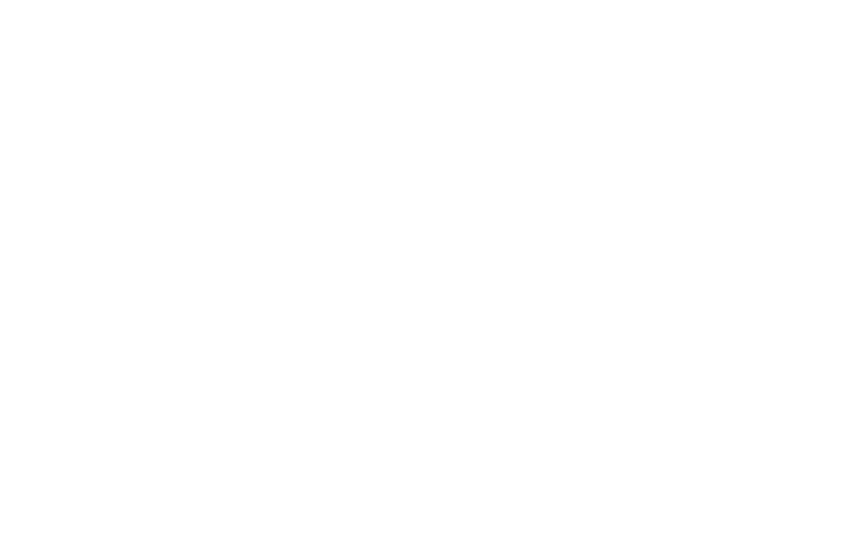

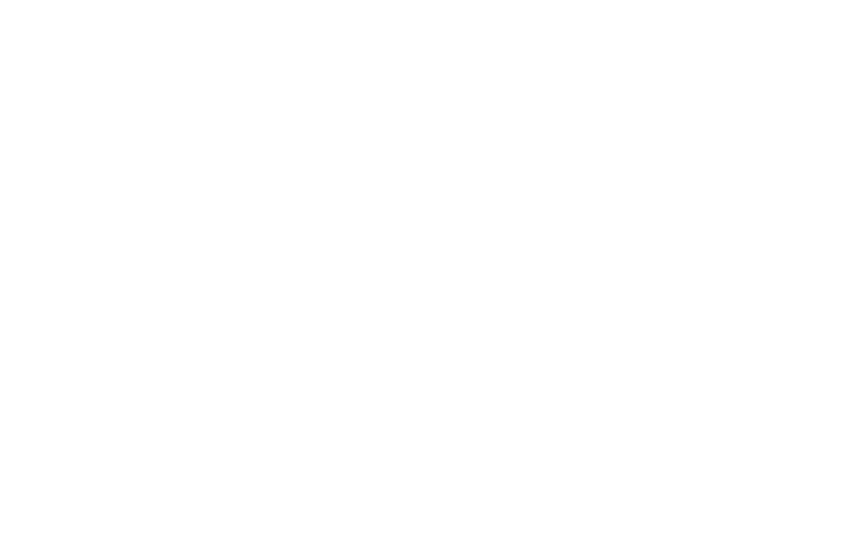

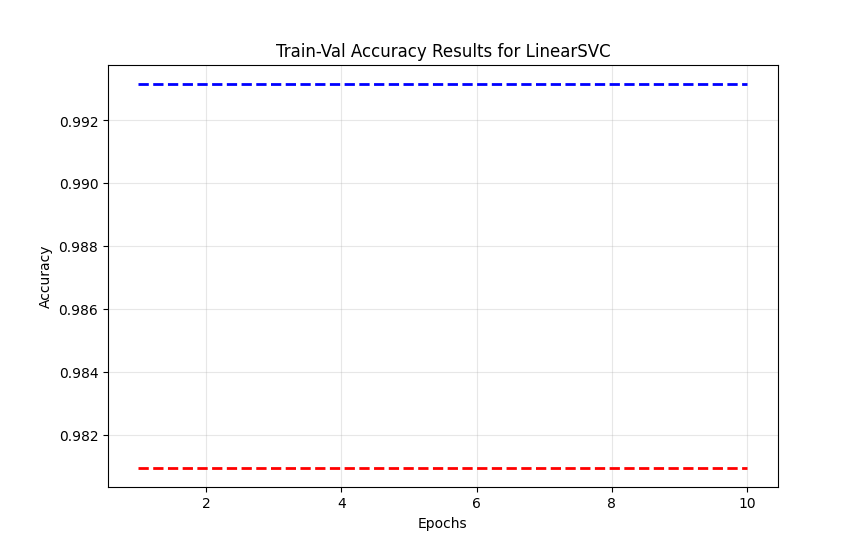

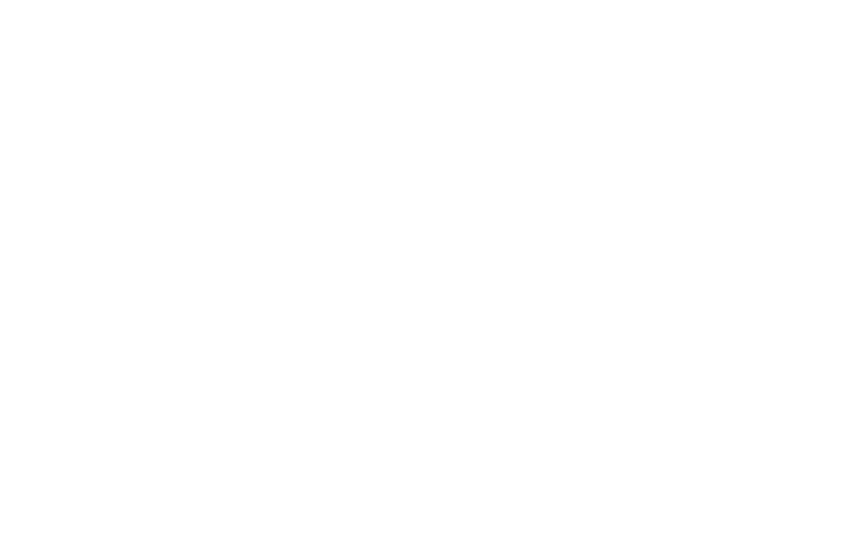

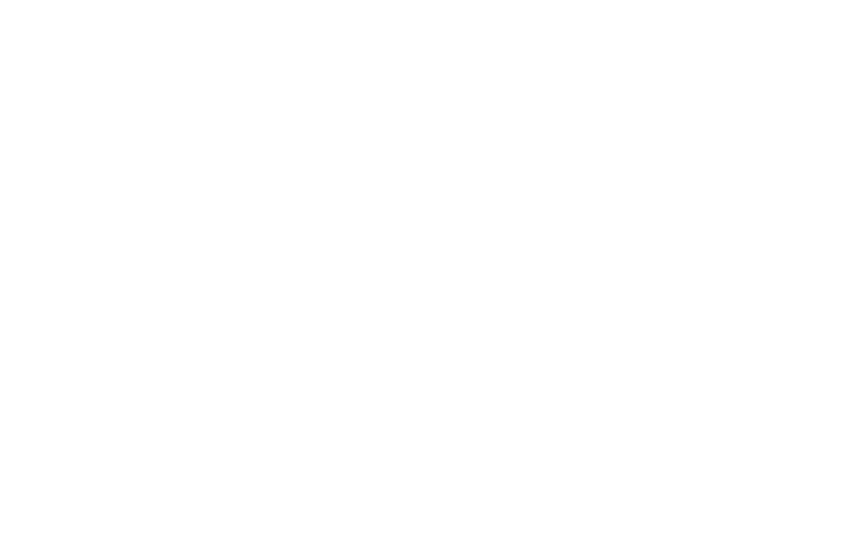

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'MultinomialNB', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9575306073088985, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567031926406926, 'macro_precision': 0.9603611835210017, 'macro_recall': 0.9418379716798638, 'macro_f1': 0.9502840909090908, 'roc_auc': 0.9418379716798638}, 'confusion_matrix': array([[281,   2],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'LinearSVC', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9672668476167441, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9663247053872055, 'macro_precision': 0.9716481685523097, 'macro_recall': 0.9526708106574502, 'macro_f1': 0.9613320707070707, 'roc_auc': 0.9526708106574502}, 'confusion_matrix': array([[281,   2],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier


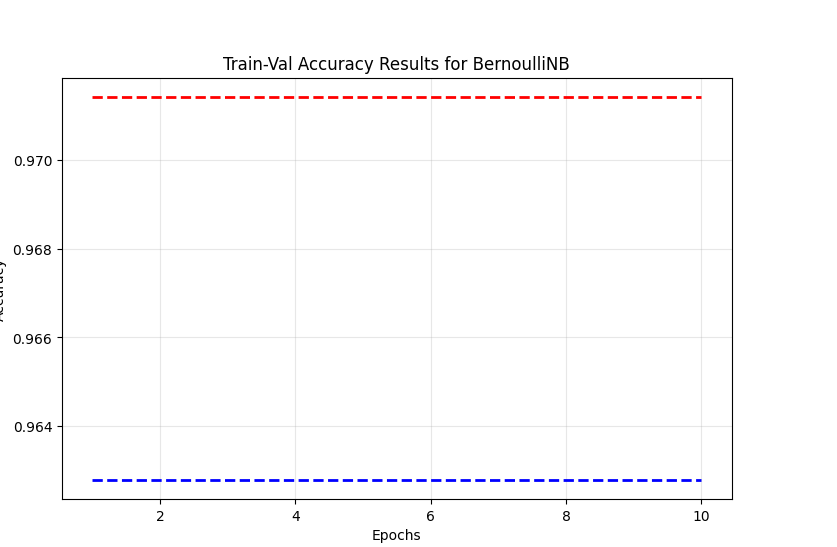

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'BernoulliNB', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Skipping epochs training due to longevity.
DecisionTreeClassifier classification report
range(1, 11)
10
10


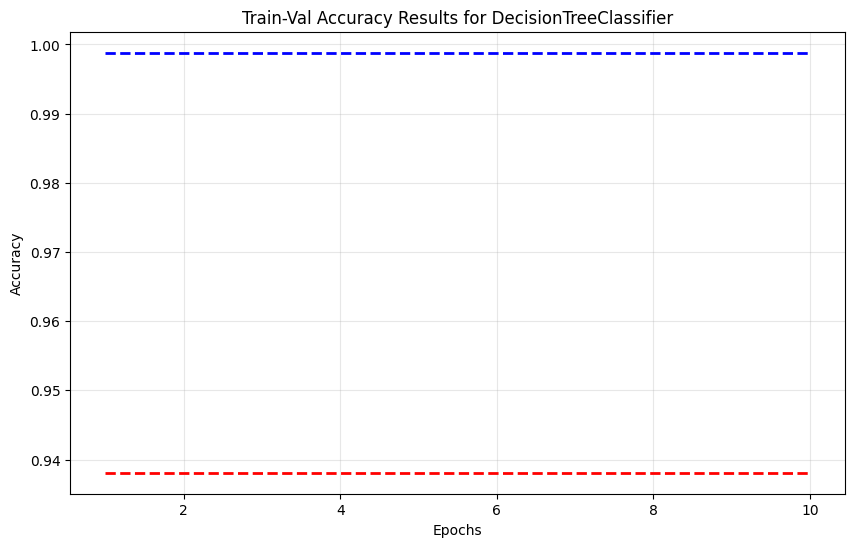

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'DecisionTreeClassifier', 'metrics': {'accuracy': 0.9333333333333333, 'weighted_precision': 0.9340044230915885, 'wighted_recall': 0.9333333333333333, 'weighted_f1': 0.9335757017162071, 'macro_precision': 0.9217570350034316, 'macro_recall': 0.9279358283252948, 'macro_f1': 0.9247292557413145, 'roc_auc': 0.9279358283252948}, 'confusion_matrix': array([[267,  16],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
RandomForestClassifier classification report
range(1, 11)
10
10


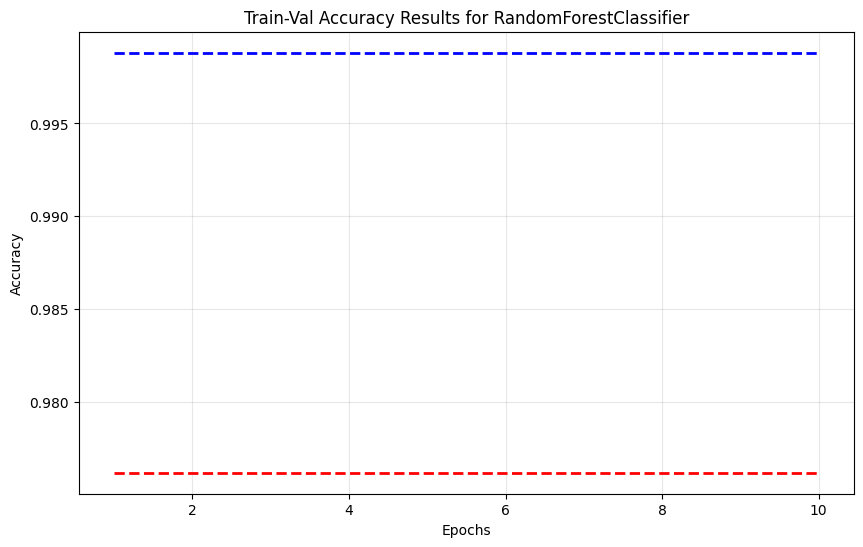

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'RandomForestClassifier', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9833515986501062, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.9832850191419313, 'macro_precision': 0.983796054691577, 'macro_recall': 0.9782182559129247, 'macro_f1': 0.9809337284936998, 'roc_auc': 0.9782182559129247}, 'confusion_matrix': array([[281,   2],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Begin Perceptron
Skipping epochs training due to longevity.
Perceptron classification report
range(1, 11)
10
10


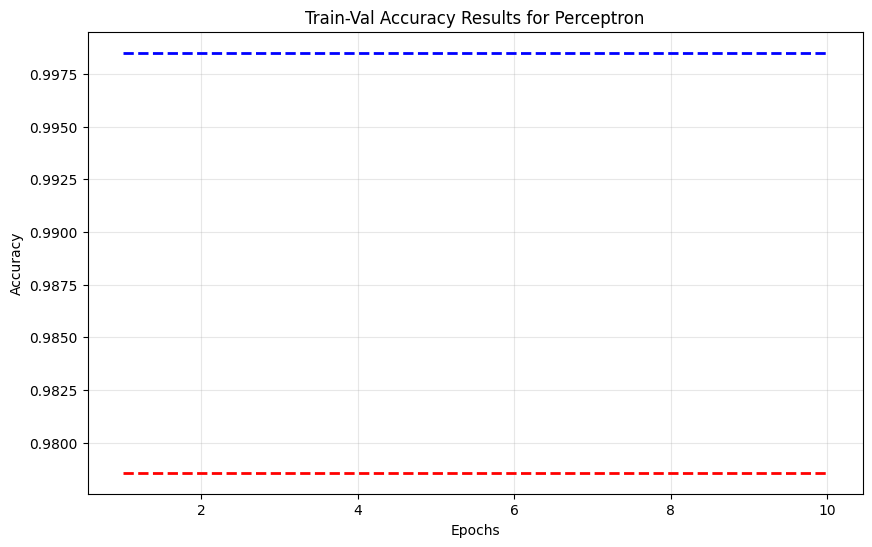

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Perceptron', 'metrics': {'accuracy': 0.9761904761904762, 'weighted_precision': 0.9761904761904762, 'wighted_recall': 0.9761904761904762, 'weighted_f1': 0.9761904761904762, 'macro_precision': 0.9729179025560342, 'macro_recall': 0.9729179025560342, 'macro_f1': 0.9729179025560342, 'roc_auc': 0.9729179025560343}, 'confusion_matrix': array([[278,   5],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Skipping epochs training due to longevity.
PassiveAggressiveClassifier classification report
range(1, 11)
10
10


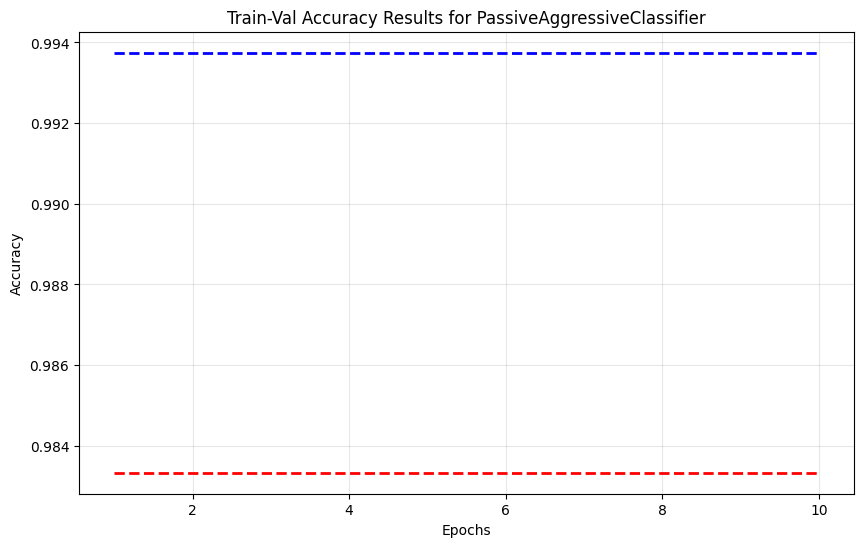

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'PassiveAggressiveClassifier', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9717878168609407, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9711980299180005, 'macro_precision': 0.9750659314313115, 'macro_recall': 0.9599700807304428, 'macro_f1': 0.9669906473500824, 'roc_auc': 0.9599700807304428}, 'confusion_matrix': array([[281,   2],
       [ 10, 127]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
Begin XGBClassifier
Skipping epochs training due to longevity.
AdaBoostClassifier classification report
range(1, 11)
10
10


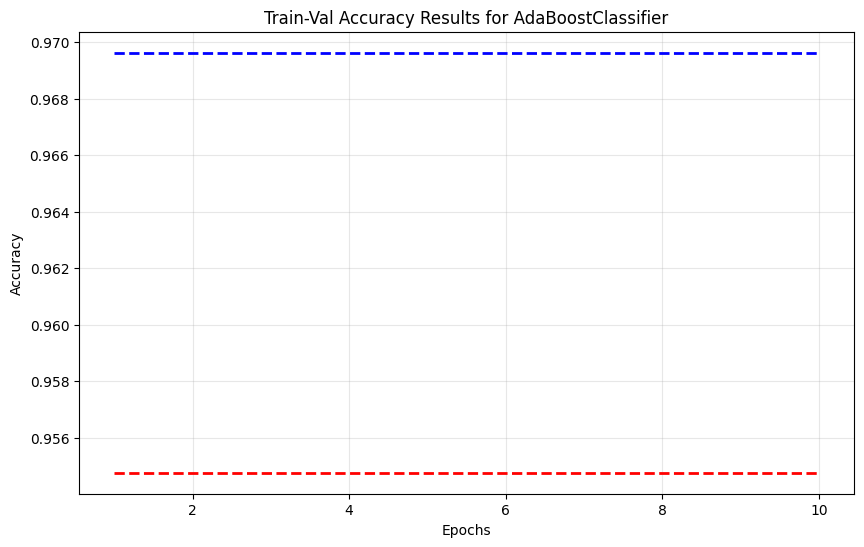

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'AdaBoostClassifier', 'metrics': {'accuracy': 0.9476190476190476, 'weighted_precision': 0.9474059713744291, 'wighted_recall': 0.9476190476190476, 'weighted_f1': 0.9474148333797456, 'macro_precision': 0.9435173299101411, 'macro_recall': 0.9366536844548761, 'macro_f1': 0.9399610136452241, 'roc_auc': 0.9366536844548761}, 'confusion_matrix': array([[274,   9],
       [ 13, 124]], dtype=int64), 'epochs': 10}


ExtraTreesClassifier classification report
range(1, 11)
10
10


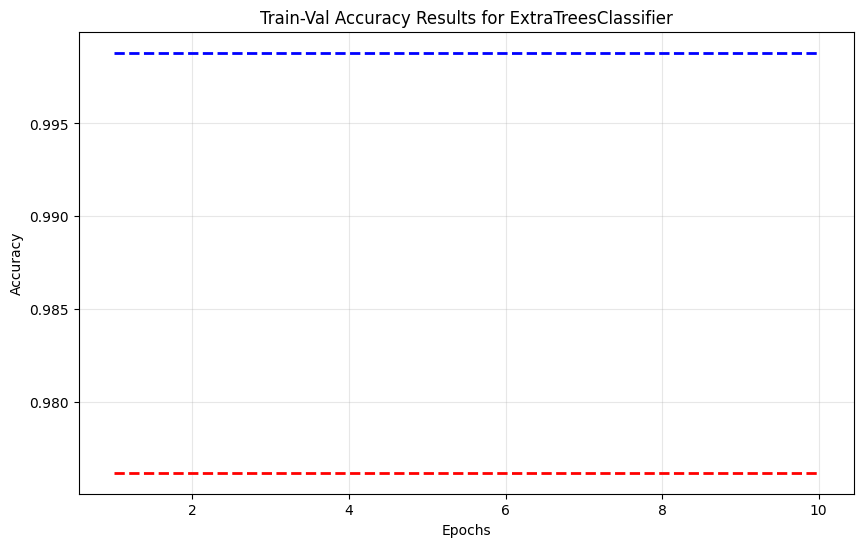

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'ExtraTreesClassifier', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9860108749382106, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856292960770572, 'macro_precision': 0.9896193771626298, 'macro_recall': 0.9781021897810219, 'macro_f1': 0.9835612149044985, 'roc_auc': 0.9781021897810219}, 'confusion_matrix': array([[283,   0],
       [  6, 131]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report
range(1, 11)
10
10


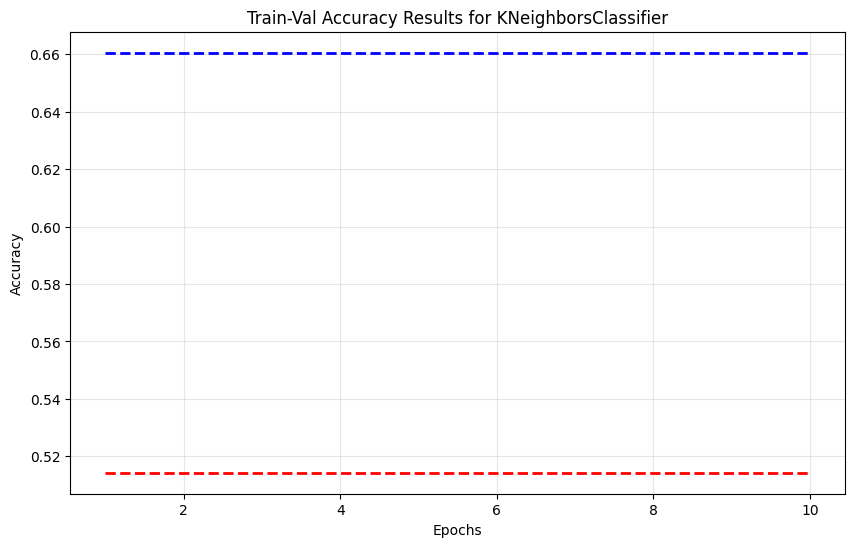

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'KNeighborsClassifier', 'metrics': {'accuracy': 0.5261904761904762, 'weighted_precision': 0.8068098072562359, 'wighted_recall': 0.5261904761904762, 'weighted_f1': 0.4974028717200887, 'macro_precision': 0.7038690476190477, 'macro_recall': 0.6484098939929328, 'macro_f1': 0.5185234257536393, 'roc_auc': 0.6484098939929328}, 'confusion_matrix': array([[ 84, 199],
       [  0, 137]], dtype=int64), 'epochs': 10}


XGBClassifier classification report
range(1, 11)
10
10


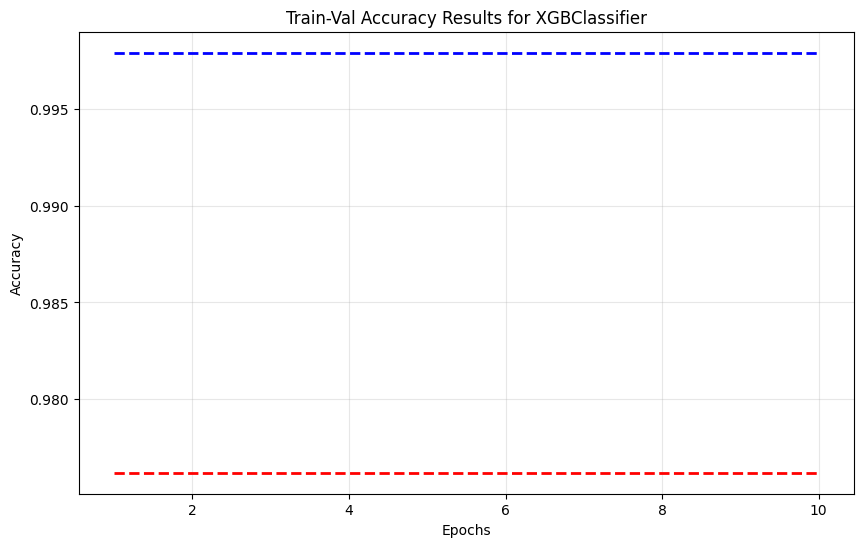

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'XGBClassifier', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9737722906063834, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9737846515624293, 'macro_precision': 0.9710542667771334, 'macro_recall': 0.9692682675195379, 'macro_f1': 0.9701533034866369, 'roc_auc': 0.9692682675195379}, 'confusion_matrix': array([[278,   5],
       [  6, 131]], dtype=int64), 'epochs': 10}




In [23]:
clsml2 = ClassificationModel2(spam_assassin_stemming_tfidf, csv_file["Is_spam"], "spam_assassin_stemmed_tfidf")
clsml2.split()

m_r = clsml2.train_and_evaluate_models(
    valid_size=0.1,
    max_workers=4,
    nomlp=True,
    threading=True,
    save_plot=True
)

metric_results.extend(m_r)

del spam_assassin_stemming_tfidf, m_r

## Lemmatizing + CountVectorizer

In [24]:
spam_assassin_lemmatizing = preprocessed_data.apply(preprocessing.lemmatizing)
spam_assassin_lemmatizing_countvec = preprocessing.vectorizing(spam_assassin_lemmatizing, "countvectorizer")

Val size:  (420, 11280)
Threading avaiable
Begin KNeighborsClassifier
Skipping epochs training due to longevity.
Begin LinearSVC
Skipping epochs training due to longevity.
Begin MultinomialNB
Skipping epochs training due to longevity.
Begin BernoulliNB
Skipping epochs training due to longevity.
MultinomialNB classification report
range(1, 11)
10
10
BernoulliNB classification report
range(1, 11)
10
10


e:\Python Tests\AI\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC classification report
range(1, 11)
10
10


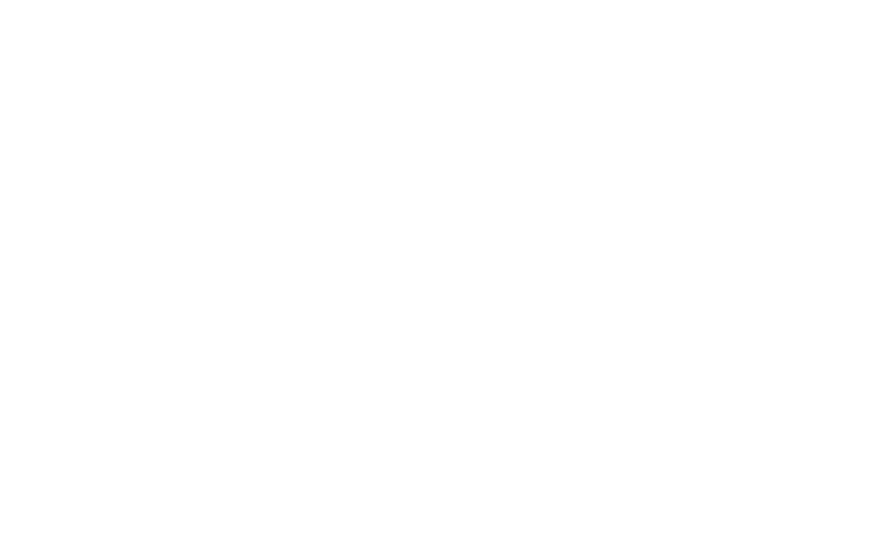

KNeighborsClassifier classification report
range(1, 11)
10
10


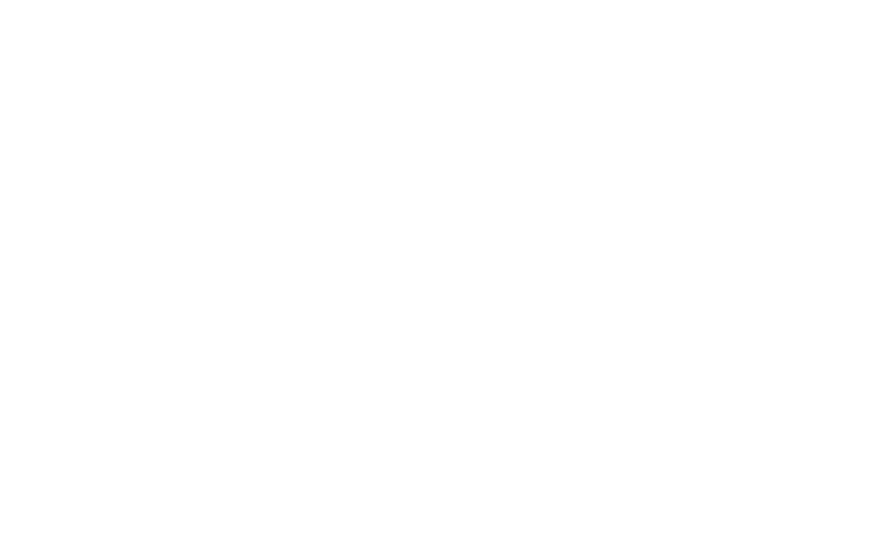

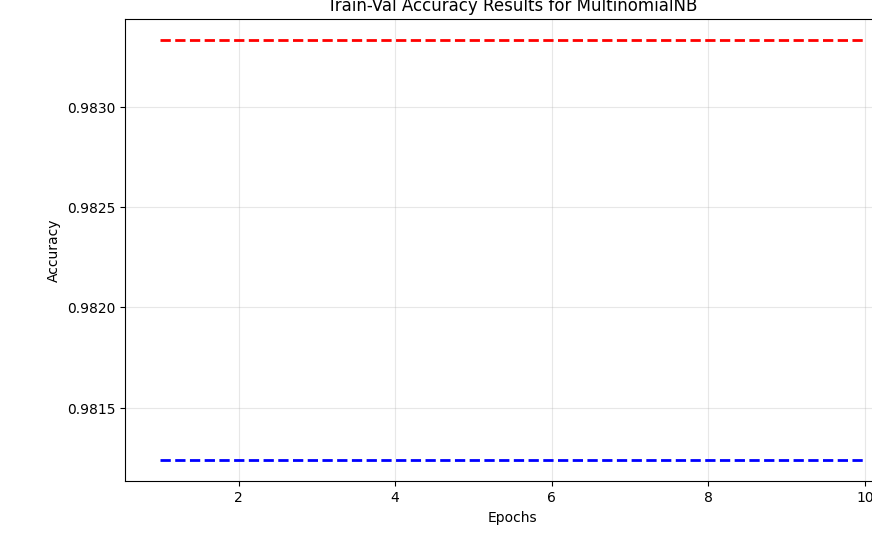

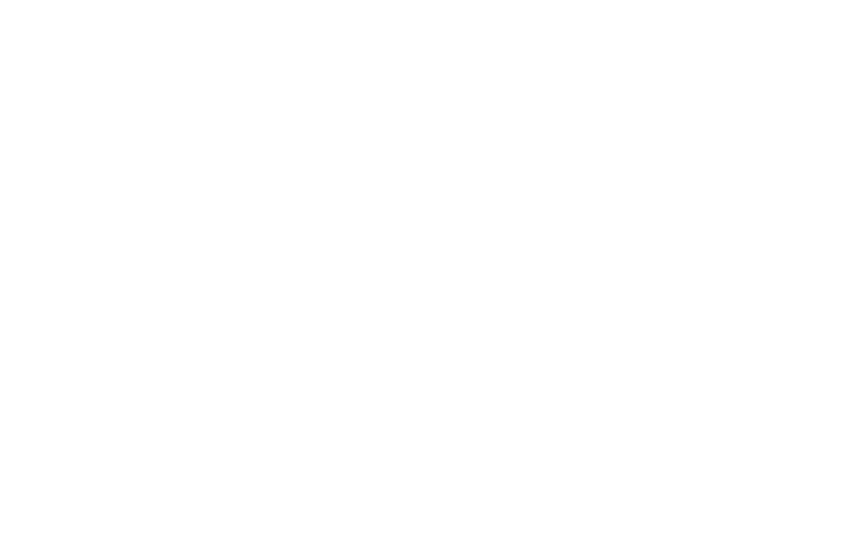

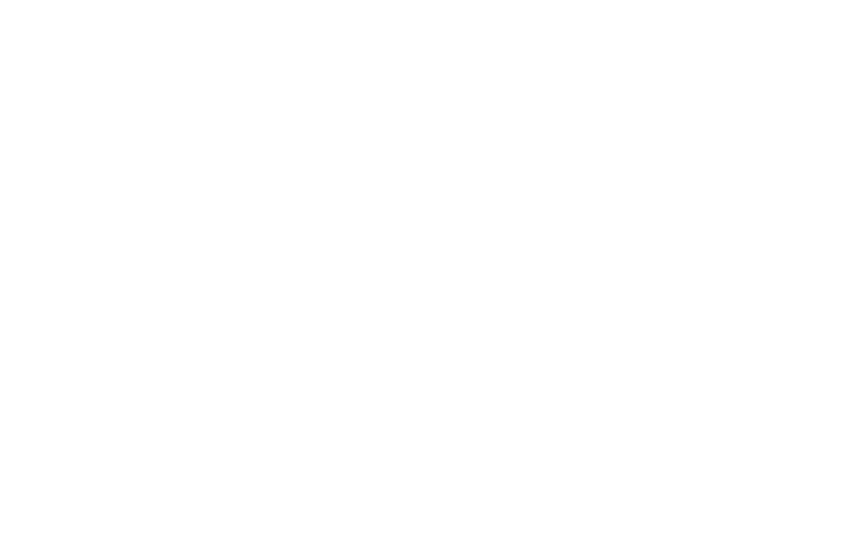

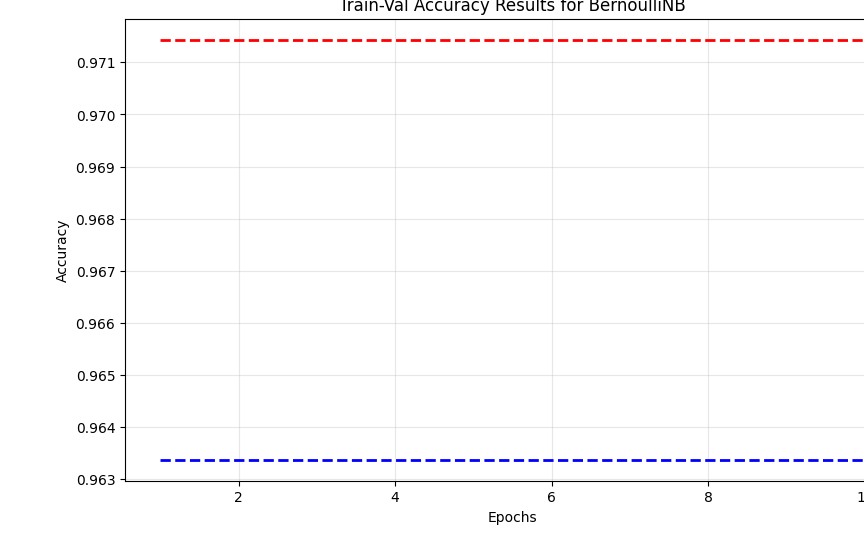

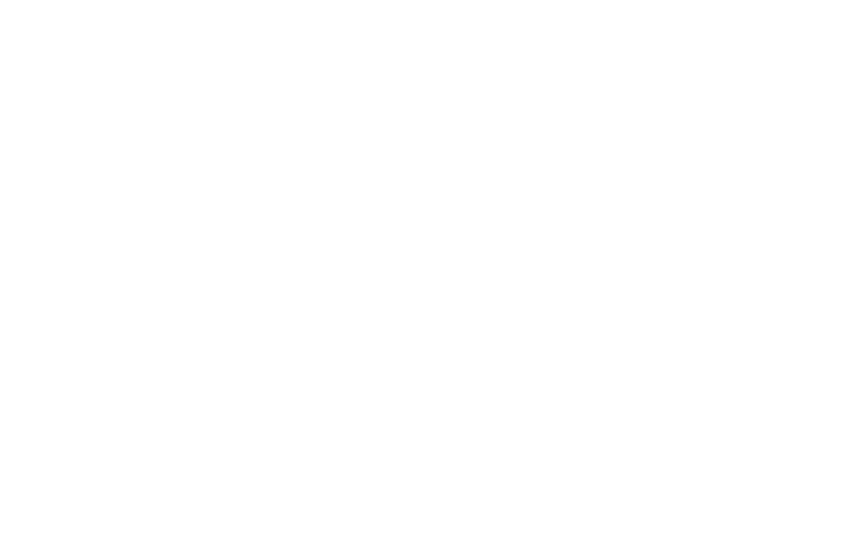

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'MultinomialNB', 'metrics': {'accuracy': 0.9595238095238096, 'weighted_precision': 0.9598081784083496, 'wighted_recall': 0.9595238095238096, 'weighted_f1': 0.9591532481737567, 'macro_precision': 0.9621147260273972, 'macro_recall': 0.9454876067163602, 'macro_f1': 0.9531419196062346, 'roc_auc': 0.9454876067163601}, 'confusion_matrix': array([[279,   4],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier


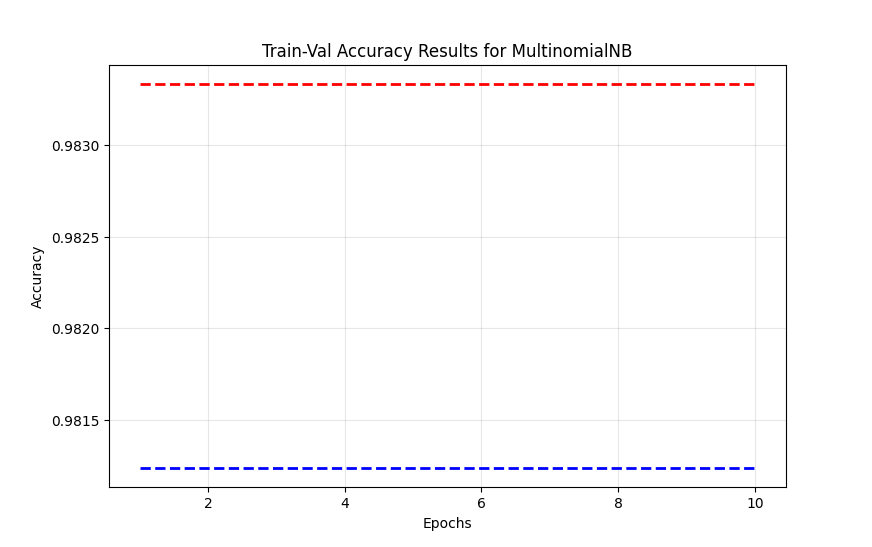

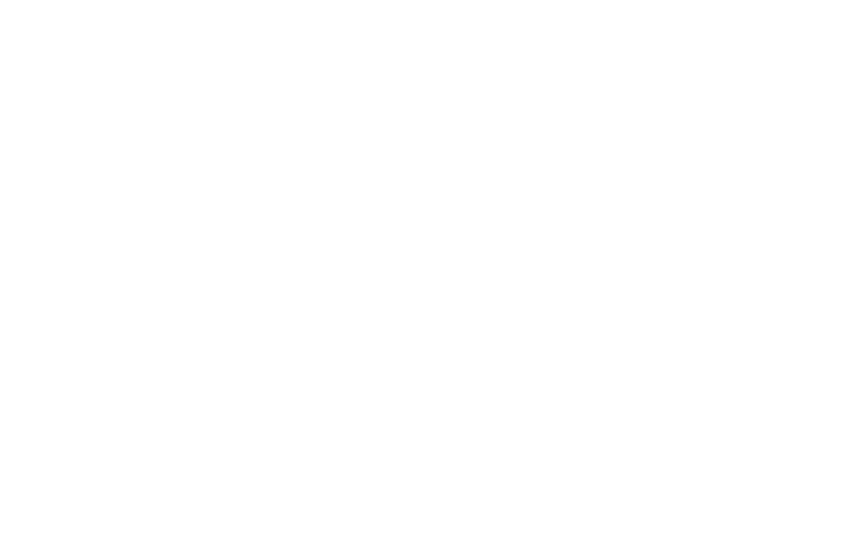

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'BernoulliNB', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier


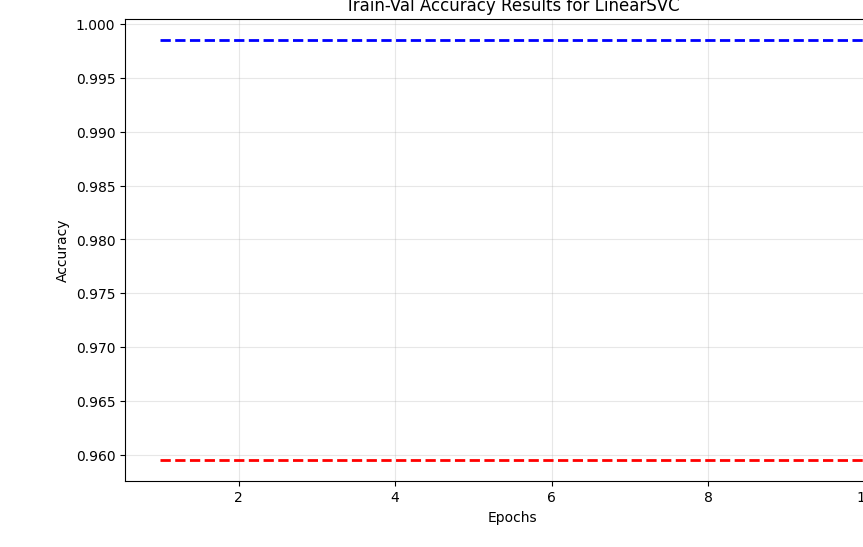

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'LinearSVC', 'metrics': {'accuracy': 0.969047619047619, 'weighted_precision': 0.9689808947271634, 'wighted_recall': 0.969047619047619, 'weighted_f1': 0.968957892692158, 'macro_precision': 0.9673572695960755, 'macro_recall': 0.9619689974465451, 'macro_f1': 0.964591210059728, 'roc_auc': 0.9619689974465452}, 'confusion_matrix': array([[278,   5],
       [  8, 129]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Skipping epochs training due to longevity.


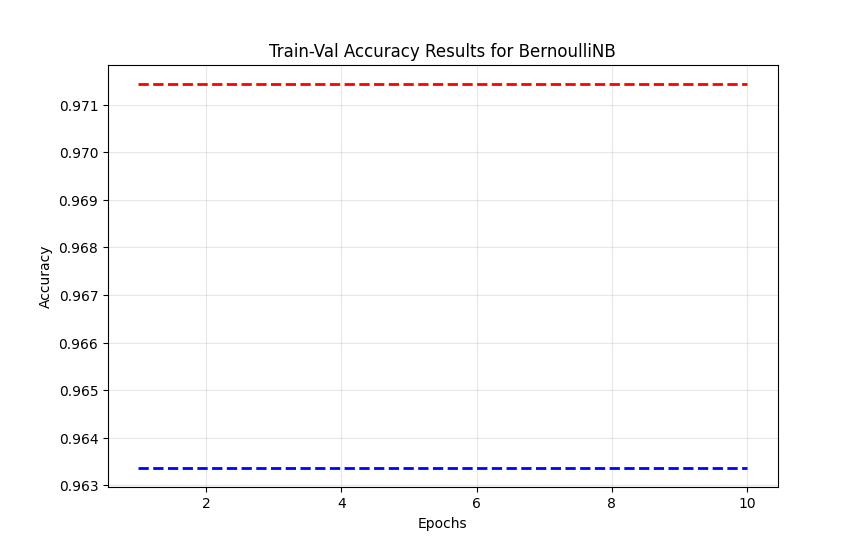

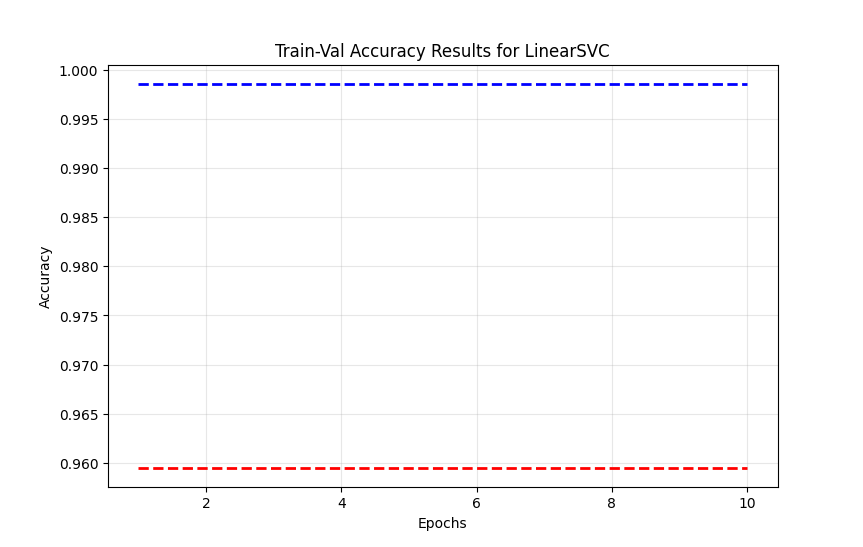

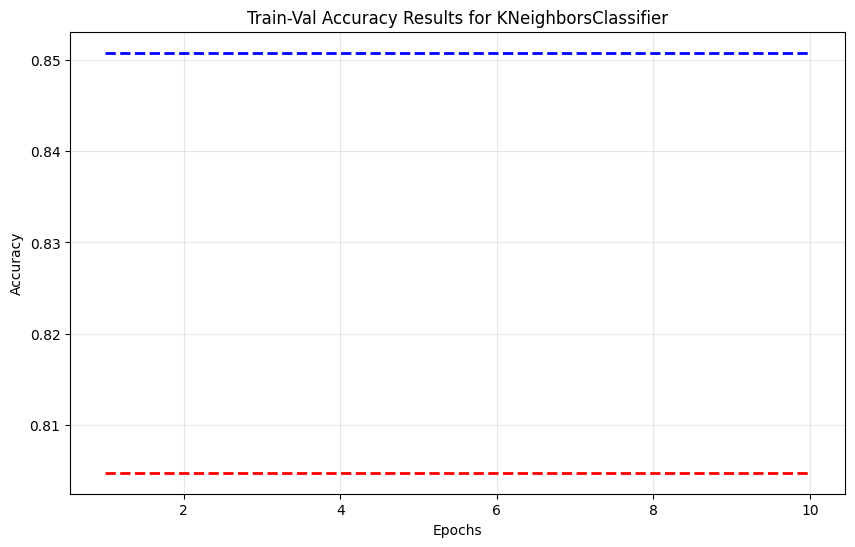

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'KNeighborsClassifier', 'metrics': {'accuracy': 0.8, 'weighted_precision': 0.8672490073737947, 'wighted_recall': 0.8, 'weighted_f1': 0.8061754843517139, 'macro_precision': 0.8043108338060125, 'macro_recall': 0.8459415542544686, 'macro_f1': 0.7946162444113264, 'roc_auc': 0.8459415542544685}, 'confusion_matrix': array([[202,  81],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
DecisionTreeClassifier classification report
range(1, 11)
10
10


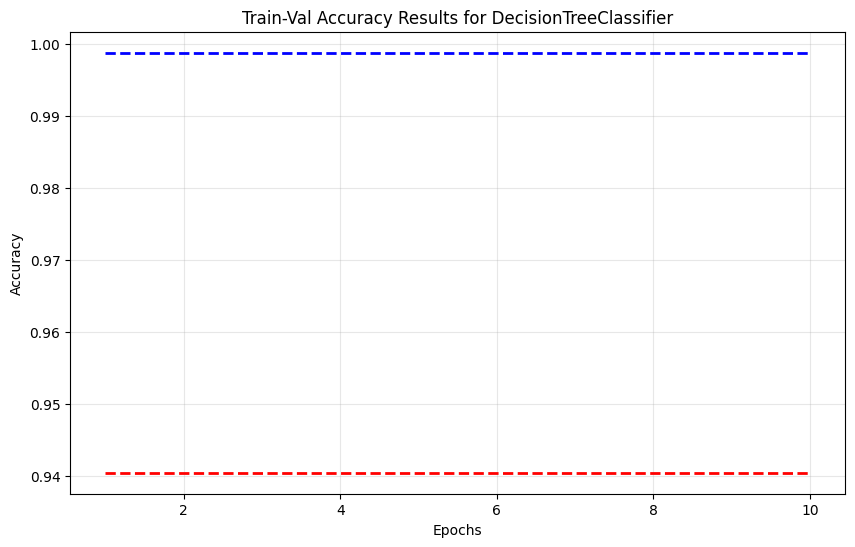

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'DecisionTreeClassifier', 'metrics': {'accuracy': 0.9428571428571428, 'weighted_precision': 0.9428571428571428, 'wighted_recall': 0.9428571428571428, 'weighted_f1': 0.9428571428571428, 'macro_precision': 0.935002966134482, 'macro_recall': 0.935002966134482, 'macro_f1': 0.935002966134482, 'roc_auc': 0.935002966134482}, 'confusion_matrix': array([[271,  12],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Begin Perceptron
Skipping epochs training due to longevity.
Perceptron classification report
range(1, 11)
10
10
RandomForestClassifier classification report
range(1, 11)
10
10


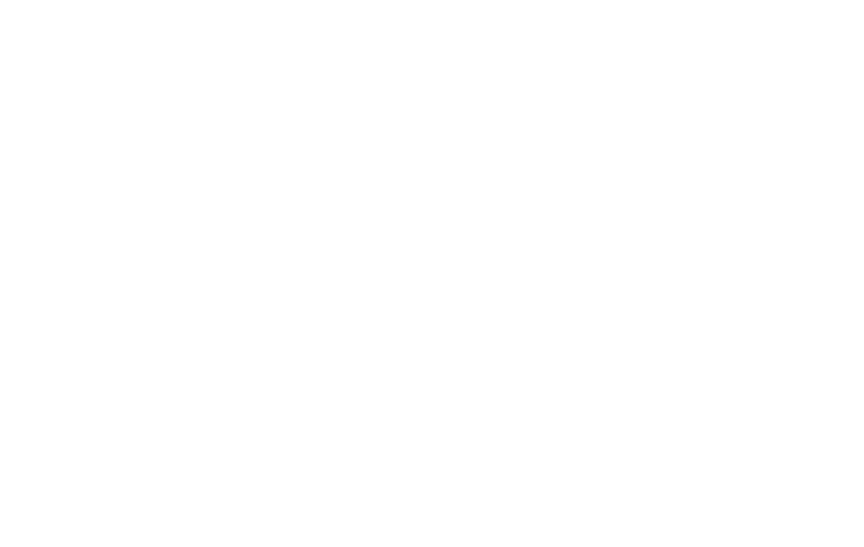

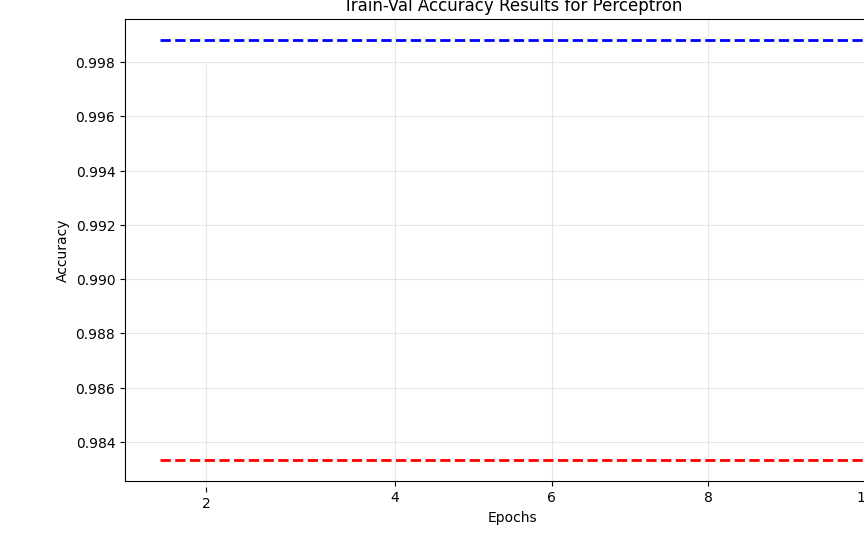

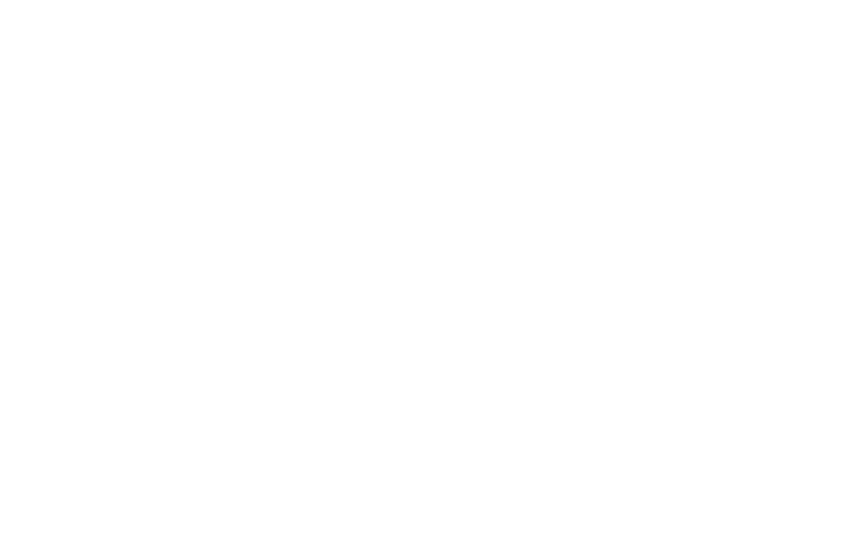

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Perceptron', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9738708280105135, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9738339654445849, 'macro_precision': 0.9693956213382671, 'macro_recall': 0.9711511181037373, 'macro_f1': 0.9702654867256637, 'roc_auc': 0.9711511181037373}, 'confusion_matrix': array([[277,   6],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Skipping epochs training due to longevity.


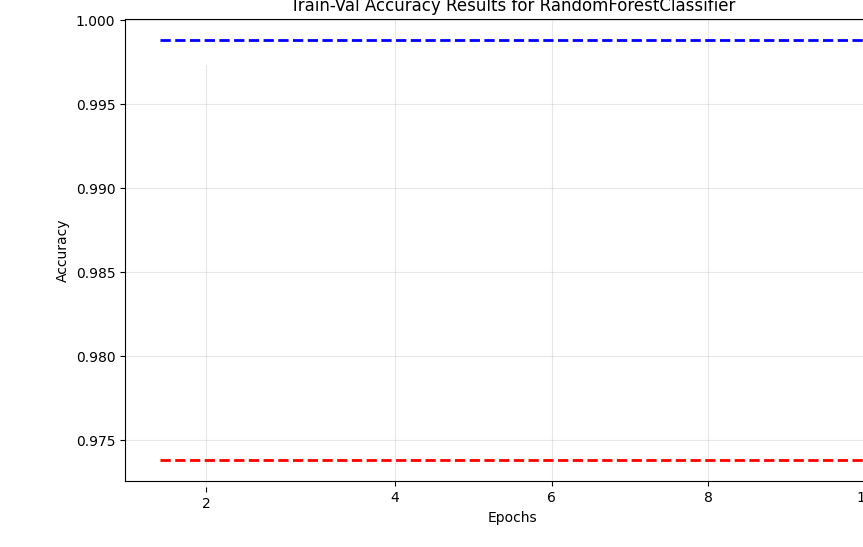

PassiveAggressiveClassifier classification report
range(1, 11)
10
10
{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'RandomForestClassifier', 'metrics': {'accuracy': 0.9809523809523809, 'weighted_precision': 0.9809301030353662, 'wighted_recall': 0.9809523809523809, 'weighted_f1': 0.9809158874817532, 'macro_precision': 0.9801169590643275, 'macro_recall': 0.9764514714606278, 'macro_f1': 0.9782518641259321, 'roc_auc': 0.9764514714606279}, 'confusion_matrix': array([[280,   3],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier


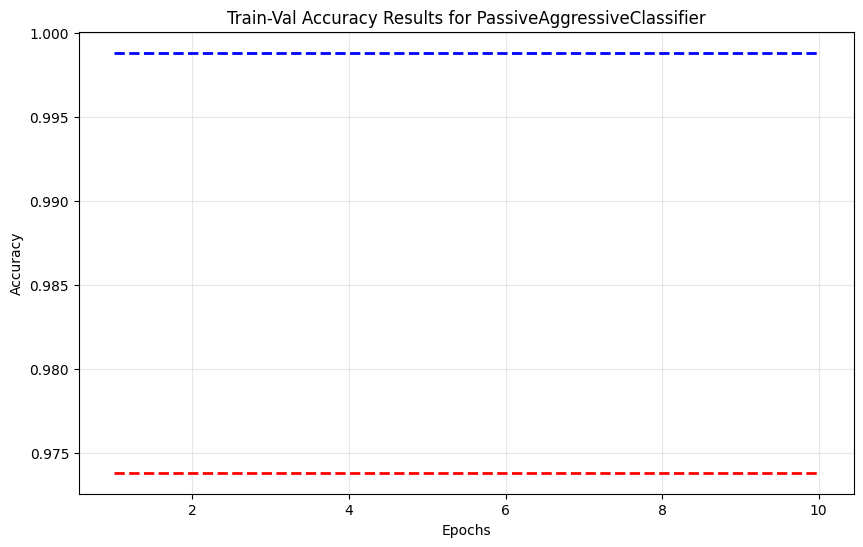

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'PassiveAggressiveClassifier', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9674593757626249, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9668452380952383, 'macro_precision': 0.9578147484284669, 'macro_recall': 0.9677336153310464, 'macro_f1': 0.9625, 'roc_auc': 0.9677336153310464}, 'confusion_matrix': array([[273,  10],
       [  4, 133]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
Skipping epochs training due to longevity.
AdaBoostClassifier classification report
range(1, 11)
10
10


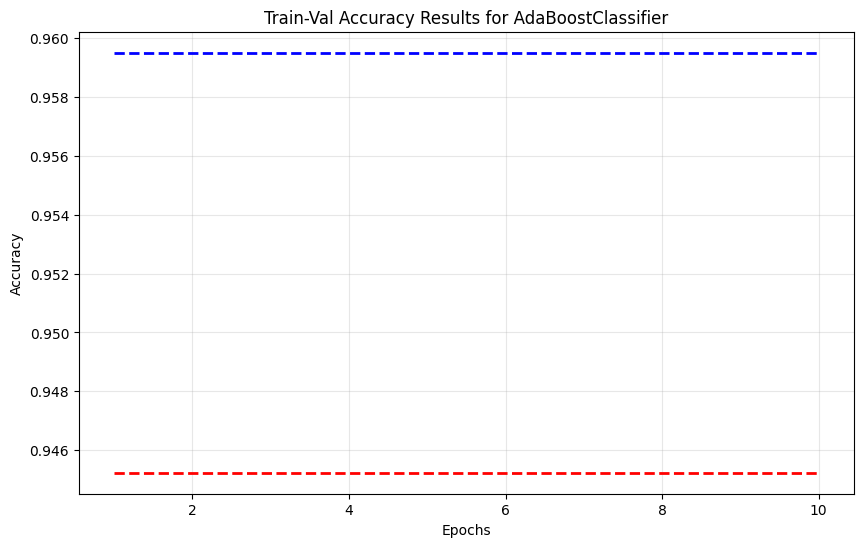

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'AdaBoostClassifier', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9403844585779517, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9399312473143482, 'macro_precision': 0.939640410958904, 'macro_recall': 0.9238219287611875, 'macro_f1': 0.9310910582444627, 'roc_auc': 0.9238219287611875}, 'confusion_matrix': array([[275,   8],
       [ 17, 120]], dtype=int64), 'epochs': 10}


ExtraTreesClassifier classification report
range(1, 11)
10
10
XGBClassifier classification report
range(1, 11)
10
10


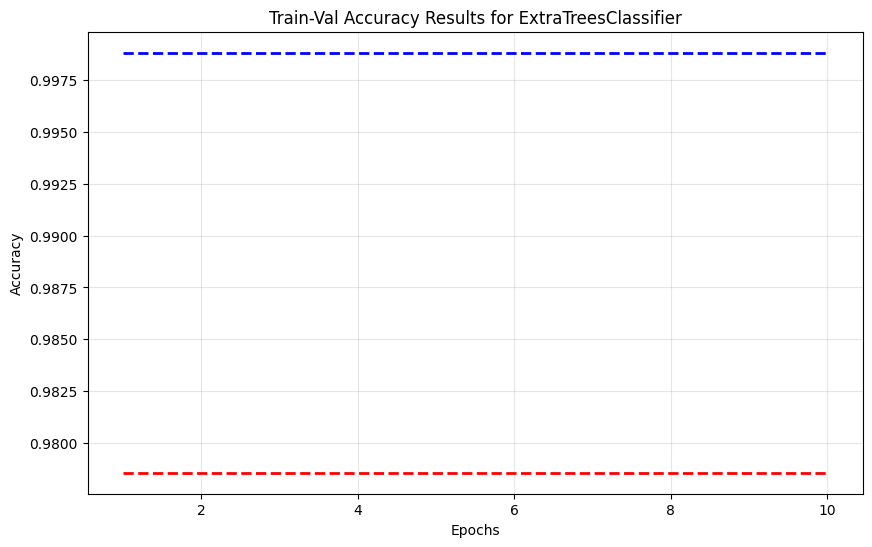

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'ExtraTreesClassifier', 'metrics': {'accuracy': 0.9809523809523809, 'weighted_precision': 0.9809301030353662, 'wighted_recall': 0.9809523809523809, 'weighted_f1': 0.9809158874817532, 'macro_precision': 0.9801169590643275, 'macro_recall': 0.9764514714606278, 'macro_f1': 0.9782518641259321, 'roc_auc': 0.9764514714606279}, 'confusion_matrix': array([[280,   3],
       [  5, 132]], dtype=int64), 'epochs': 10}


{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'XGBClassifier', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9665886939571151, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9666028030930682, 'macro_precision': 0.9637426900584796, 'macro_recall': 0.9602022129942482, 'macro_f1': 0.9619407622203812, 'roc_auc': 0.9602022129942482}, 'confusion_matrix': array([[277,   6],
       [  8, 129]], dtype=int64), 'epochs': 10}




In [25]:
clsml2 = ClassificationModel2(spam_assassin_lemmatizing_countvec, csv_file["Is_spam"], "spam_assassin_lemmatized_countvec")
clsml2.split()

m_r = clsml2.train_and_evaluate_models(
    valid_size=0.1,
    max_workers=4,
    nomlp=True,
    threading=True,
    save_plot=True
)

metric_results.extend(m_r)

del spam_assassin_lemmatizing_countvec, m_r

## Lemmatizing + TF-IDF Vectorizer

In [26]:
spam_assassin_lemmatizing_tfidf = preprocessing.vectorizing(spam_assassin_lemmatizing, "tfidf")

Val size:  (420, 11280)
Threading avaiable
Begin KNeighborsClassifier
Skipping epochs training due to longevity.
Begin LinearSVC
Skipping epochs training due to longevity.
Begin MultinomialNB
Skipping epochs training due to longevity.
Begin BernoulliNB
Skipping epochs training due to longevity.
MultinomialNB classification report
range(1, 11)
10
10
BernoulliNB classification report
range(1, 11)
10
10
LinearSVC classification report
range(1, 11)
10
10


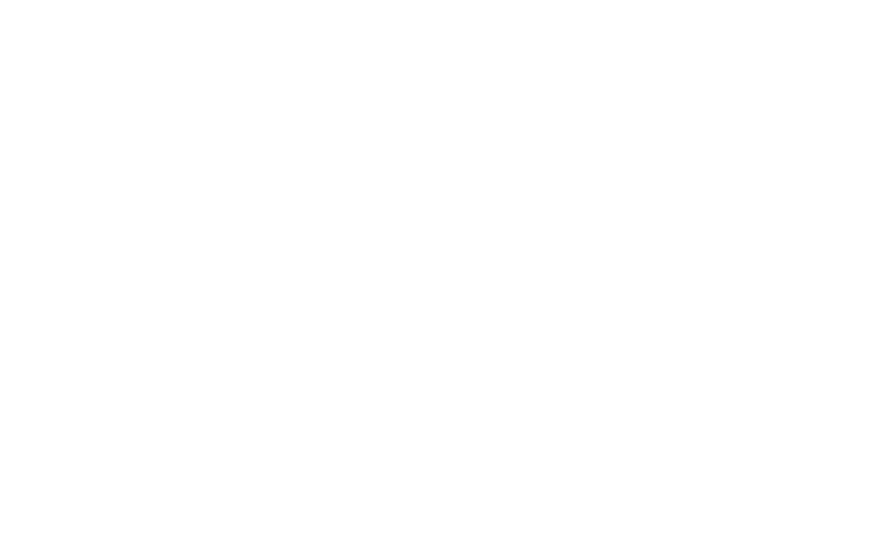

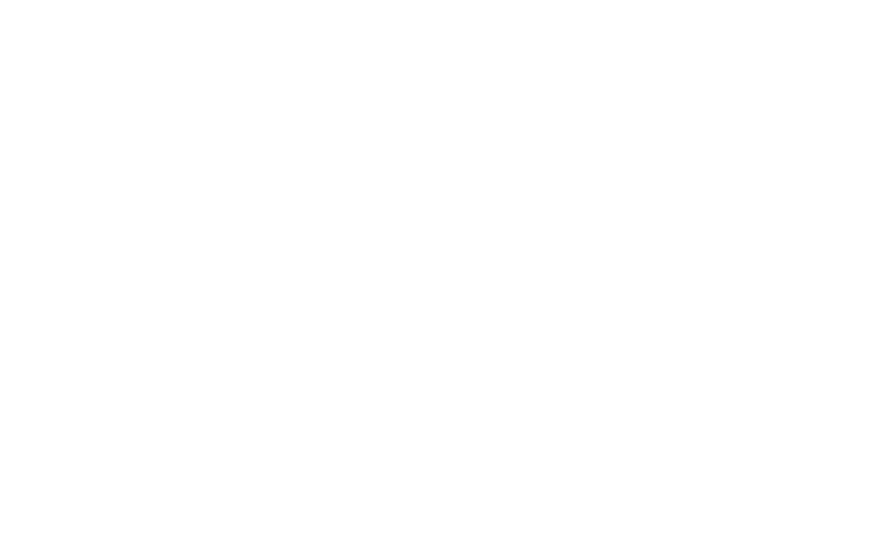

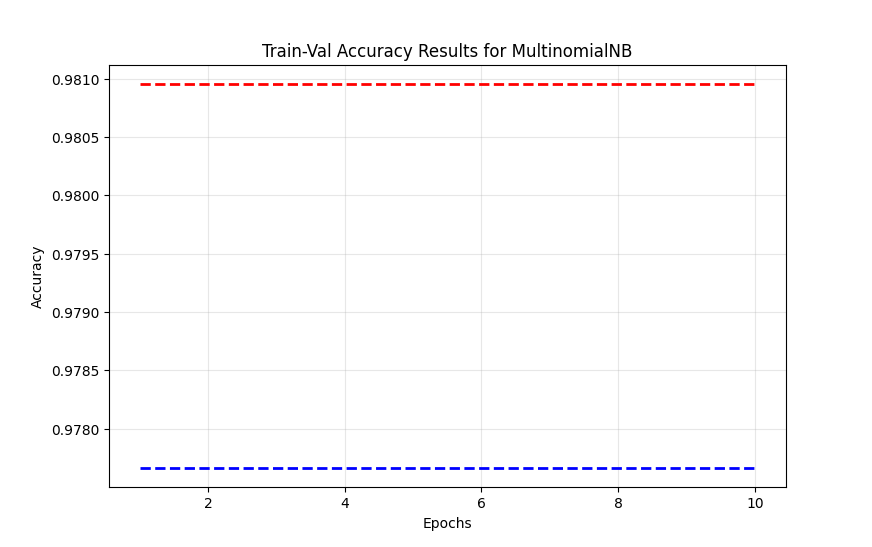

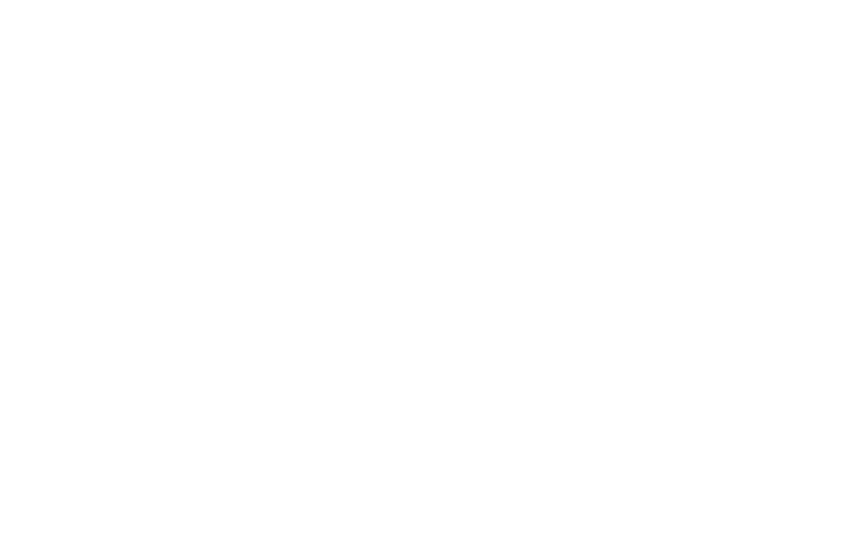

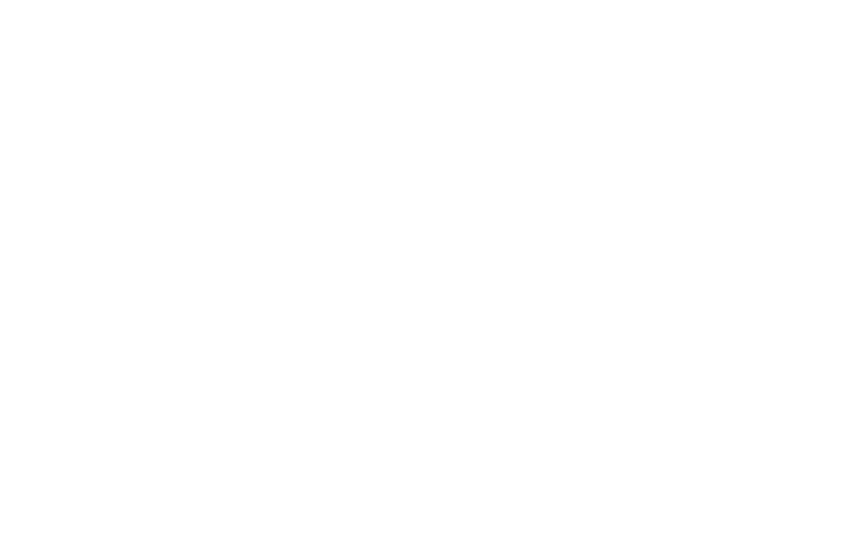

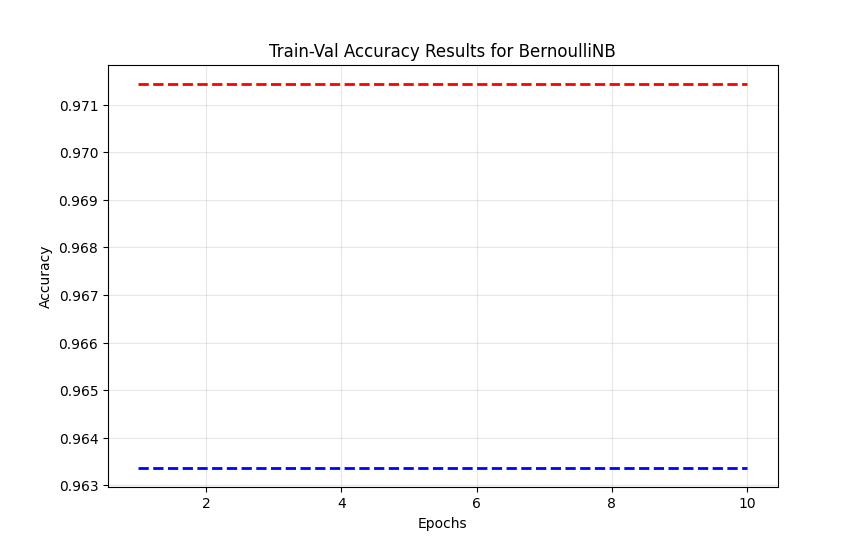

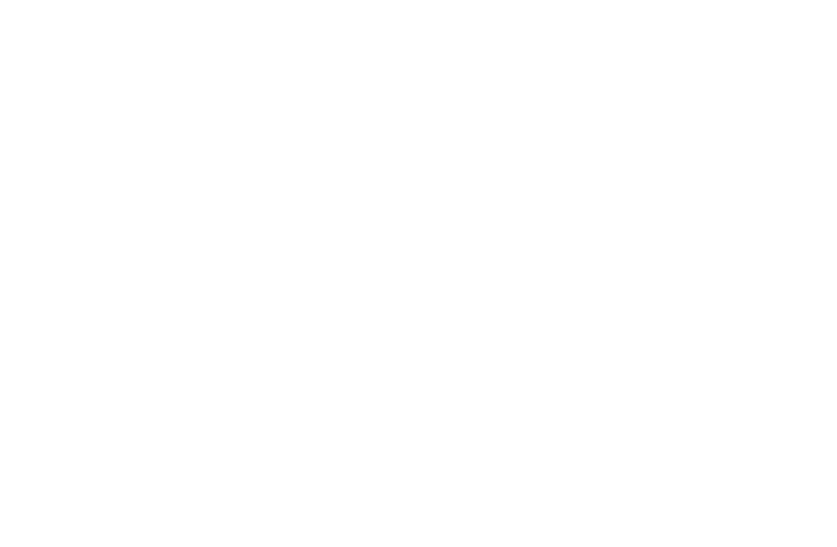

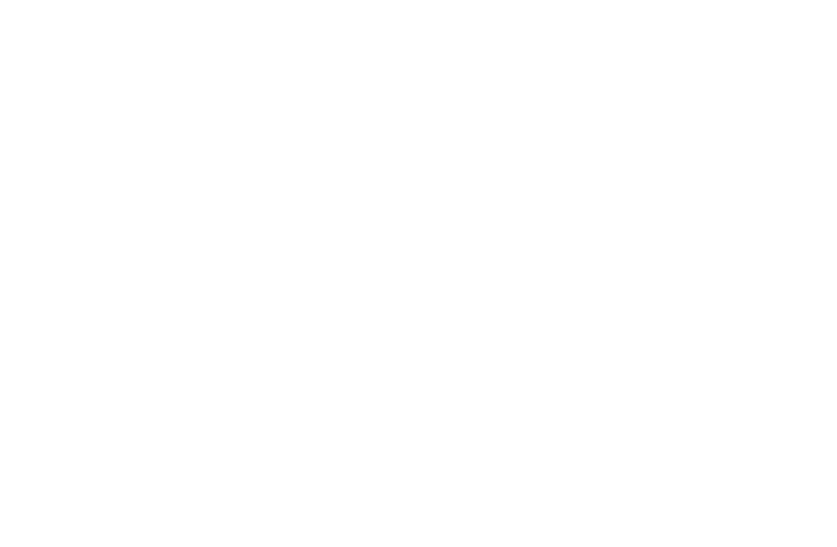

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'BernoulliNB', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'MultinomialNB', 'metrics': {'accuracy': 0.9547619047619048, 'weighted_precision': 0.9556861585087392, 'wighted_recall': 0.9547619047619048, 'weighted_f1': 0.9541431397961682, 'macro_precision': 0.9608761987794245, 'macro_recall': 0.936305486059168, 'macro_f1': 0.9471939332578961, 'roc_auc': 0.936305486059168}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier


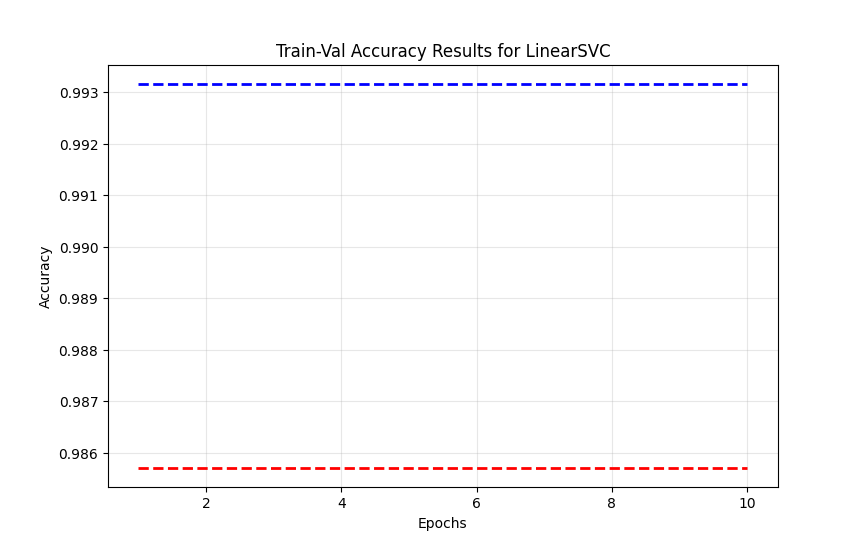

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'LinearSVC', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9725907990314769, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9710708531279598, 'macro_precision': 0.9796610169491525, 'macro_recall': 0.9562043795620438, 'macro_f1': 0.966718613803851, 'roc_auc': 0.9562043795620438}, 'confusion_matrix': array([[283,   0],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Skipping epochs training due to longevity.
DecisionTreeClassifier classification report
range(1, 11)
10
10


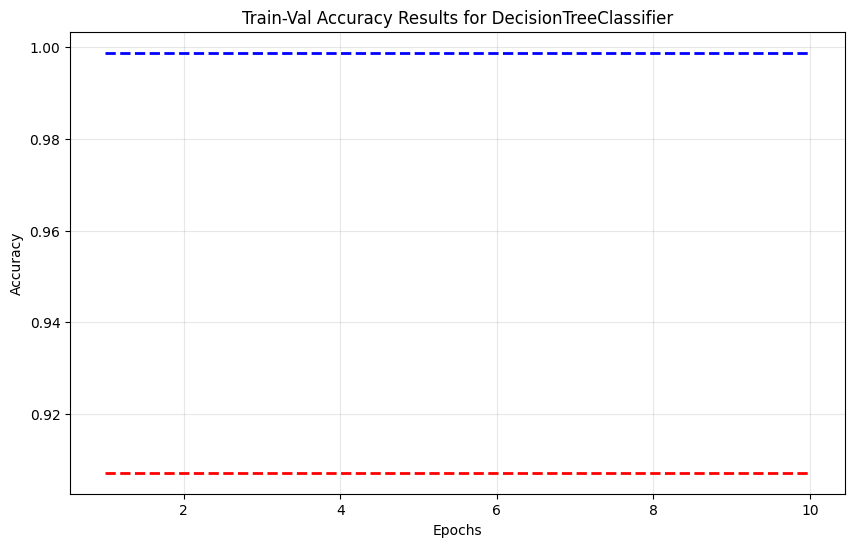

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'DecisionTreeClassifier', 'metrics': {'accuracy': 0.9452380952380952, 'weighted_precision': 0.9450297215222587, 'wighted_recall': 0.9452380952380952, 'weighted_f1': 0.9450793486092027, 'macro_precision': 0.9399592944369064, 'macro_recall': 0.9348869000025792, 'macro_f1': 0.9373536793364419, 'roc_auc': 0.9348869000025792}, 'confusion_matrix': array([[273,  10],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
RandomForestClassifier classification report
range(1, 11)
10
10


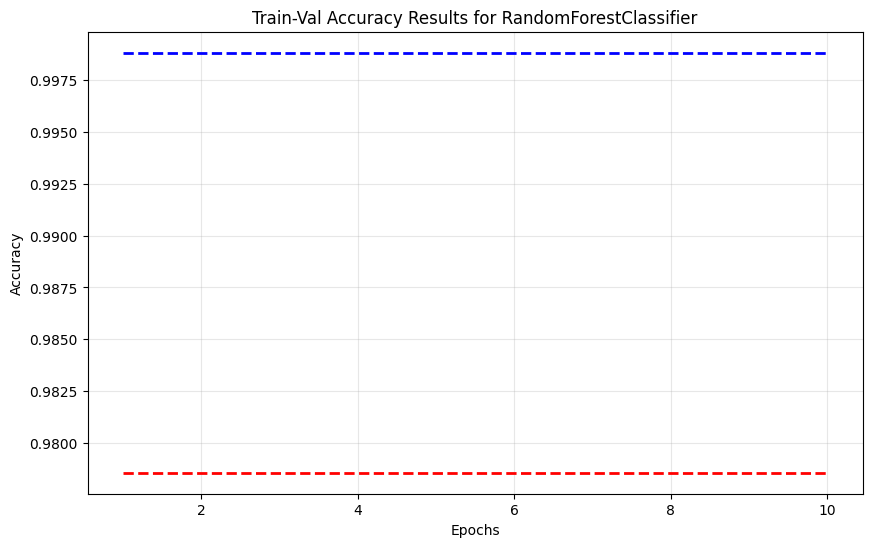

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'RandomForestClassifier', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9833515986501062, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.9832850191419313, 'macro_precision': 0.983796054691577, 'macro_recall': 0.9782182559129247, 'macro_f1': 0.9809337284936998, 'roc_auc': 0.9782182559129247}, 'confusion_matrix': array([[281,   2],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Begin Perceptron
Skipping epochs training due to longevity.
Perceptron classification report
range(1, 11)
10
10


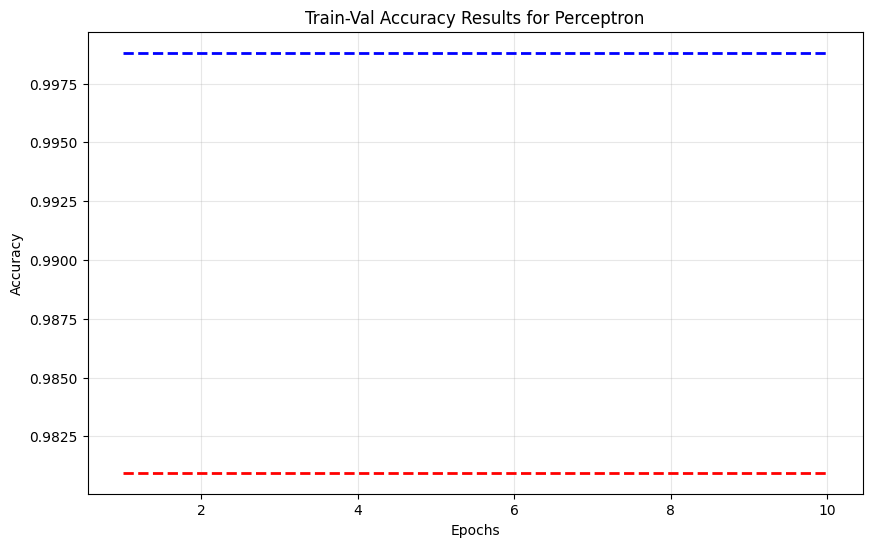

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Perceptron', 'metrics': {'accuracy': 0.9880952380952381, 'weighted_precision': 0.9880853749950684, 'wighted_recall': 0.9880952380952381, 'weighted_f1': 0.9880839325283769, 'macro_precision': 0.9873653686826844, 'macro_recall': 0.9855175259859172, 'macro_f1': 0.986433319766653, 'roc_auc': 0.9855175259859172}, 'confusion_matrix': array([[281,   2],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Skipping epochs training due to longevity.
PassiveAggressiveClassifier classification report
range(1, 11)
10
10


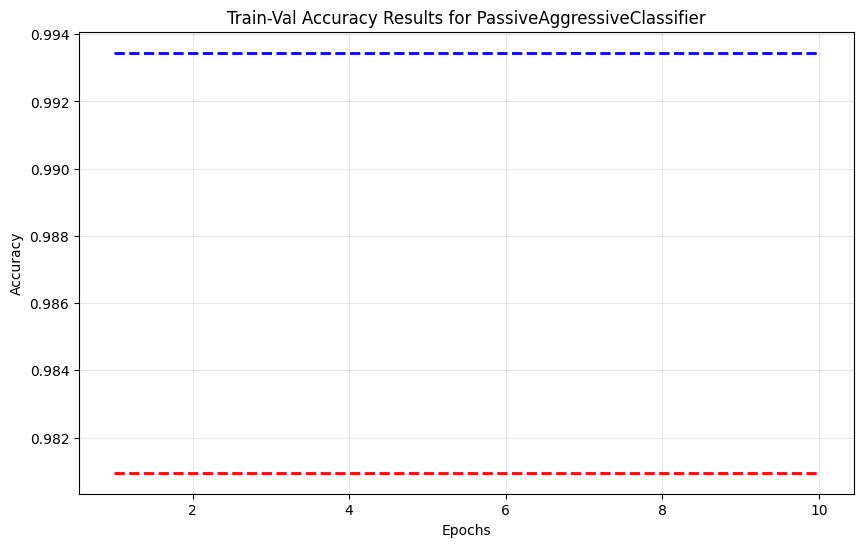

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'PassiveAggressiveClassifier', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9725907990314769, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9710708531279598, 'macro_precision': 0.9796610169491525, 'macro_recall': 0.9562043795620438, 'macro_f1': 0.966718613803851, 'roc_auc': 0.9562043795620438}, 'confusion_matrix': array([[283,   0],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
AdaBoostClassifier classification report
range(1, 11)
10
10


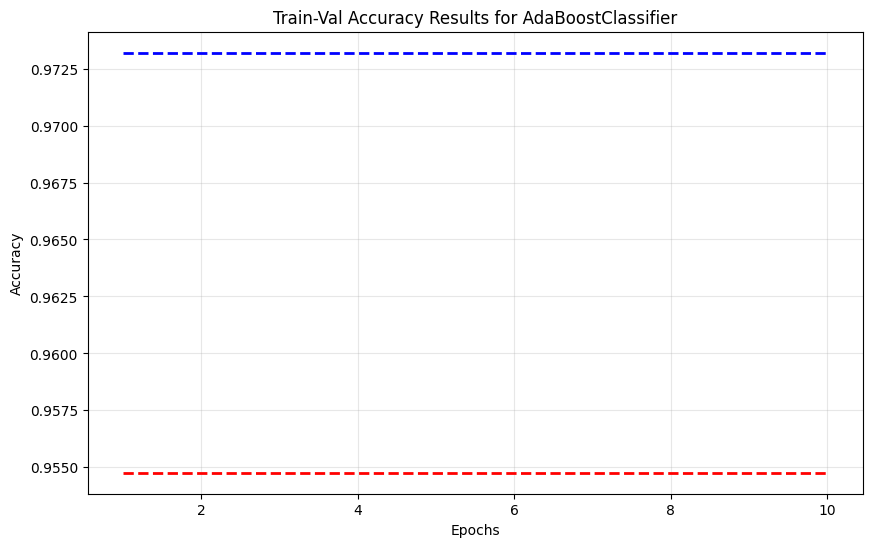

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'AdaBoostClassifier', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9405991659691938, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9405317396467839, 'macro_precision': 0.9316219549799569, 'macro_recall': 0.9332361816821851, 'macro_f1': 0.9324215607401448, 'roc_auc': 0.9332361816821853}, 'confusion_matrix': array([[270,  13],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
Skipping epochs training due to longevity.
ExtraTreesClassifier classification report
range(1, 11)
10
10


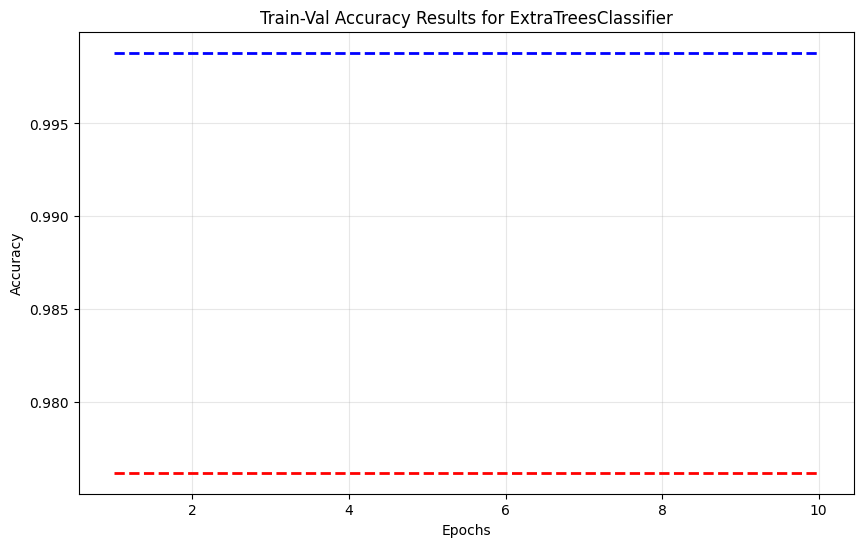

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'ExtraTreesClassifier', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9860108749382106, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856292960770572, 'macro_precision': 0.9896193771626298, 'macro_recall': 0.9781021897810219, 'macro_f1': 0.9835612149044985, 'roc_auc': 0.9781021897810219}, 'confusion_matrix': array([[283,   0],
       [  6, 131]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report
range(1, 11)
10
10


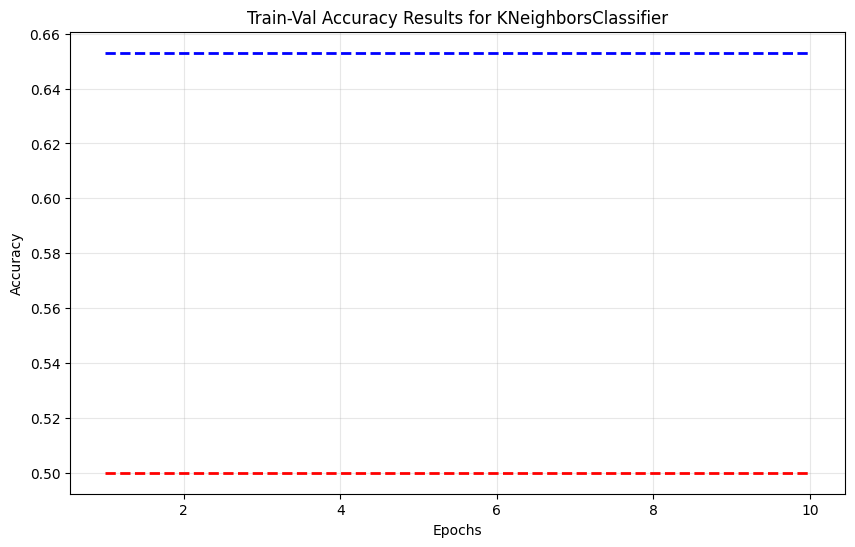

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'KNeighborsClassifier', 'metrics': {'accuracy': 0.5142857142857142, 'weighted_precision': 0.8048596564725597, 'wighted_recall': 0.5142857142857142, 'weighted_f1': 0.4810731375469349, 'macro_precision': 0.7008797653958945, 'macro_recall': 0.6395759717314488, 'macro_f1': 0.5048429228599829, 'roc_auc': 0.6395759717314488}, 'confusion_matrix': array([[ 79, 204],
       [  0, 137]], dtype=int64), 'epochs': 10}


XGBClassifier classification report
range(1, 11)
10
10


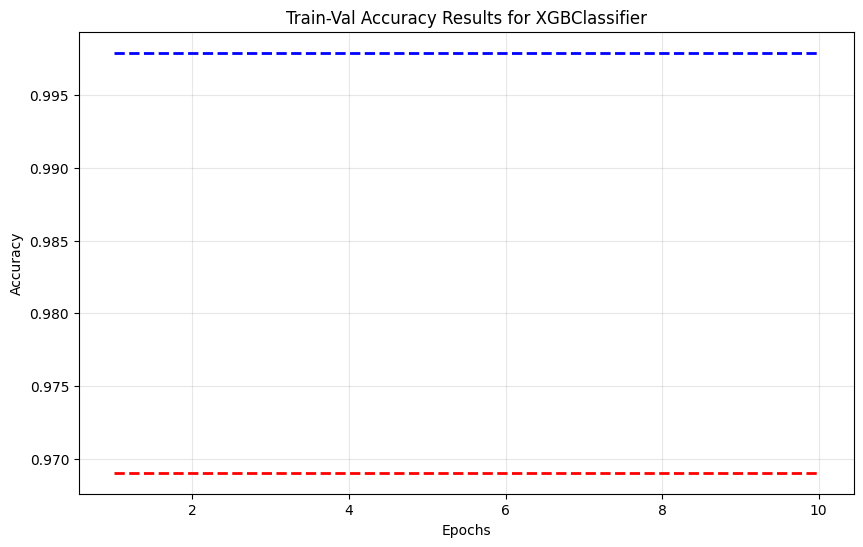

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'XGBClassifier', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9666072847624289, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9665367121507472, 'macro_precision': 0.9655235650100862, 'macro_recall': 0.9583193624100488, 'macro_f1': 0.9617933723196881, 'roc_auc': 0.9583193624100488}, 'confusion_matrix': array([[278,   5],
       [  9, 128]], dtype=int64), 'epochs': 10}




In [27]:
clsml2 = ClassificationModel2(spam_assassin_lemmatizing_tfidf, csv_file["Is_spam"], "spam_assassin_lemmatized_tfidf")
clsml2.split()

m_r = clsml2.train_and_evaluate_models(
    valid_size=0.1,
    max_workers=4,
    nomlp=True,
    threading=True,
    save_plot=True
)

metric_results.extend(m_r)

del spam_assassin_lemmatizing_tfidf, m_r

In [28]:
print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./spam_assassin_classification_report.json", metric_results, mode="overwrite")

[{'dataset': 'spam_assassin_stemmed_countvec', 'model': 'MultinomialNB', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9572555018970748, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567970448770009, 'macro_precision': 0.9582833852793096, 'macro_recall': 0.9437208222640634, 'macro_f1': 0.9504859710251239, 'roc_auc': 0.9437208222640634}, 'confusion_matrix': array([[278,   5],
       [ 13, 124]], dtype=int64), 'epochs': 10}, {'dataset': 'spam_assassin_stemmed_countvec', 'model': 'BernoulliNB', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}, {'dataset': 'spam_assassin_stemmed_countvec', 'model': 'LinearSVC', 'metrics': {'accu